In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-top-10-cities-electricity-and-weather-data/EIA930_SUBREGION_2019_Jul_Dec.csv
/kaggle/input/us-top-10-cities-electricity-and-weather-data/EIA930_BALANCE_2018_Jul_Dec.csv
/kaggle/input/us-top-10-cities-electricity-and-weather-data/san_jose.json
/kaggle/input/us-top-10-cities-electricity-and-weather-data/EIA930_BALANCE_2020_Jan_Jun.csv
/kaggle/input/us-top-10-cities-electricity-and-weather-data/la.json
/kaggle/input/us-top-10-cities-electricity-and-weather-data/san_diego.json
/kaggle/input/us-top-10-cities-electricity-and-weather-data/cleaned_texas_data.csv
/kaggle/input/us-top-10-cities-electricity-and-weather-data/texas2019.csv
/kaggle/input/us-top-10-cities-electricity-and-weather-data/philadelphia.json
/kaggle/input/us-top-10-cities-electricity-and-weather-data/EIA930_SUBREGION_2020_Jan_Jun.csv
/kaggle/input/us-top-10-cities-electricity-and-weather-data/san_antonio.json
/kaggle/input/us-top-10-cities-electricity-and-weather-data/cleaned_subregion_data.csv
/kaggle/inpu

In [2]:
import json
import csv
import os

# List of city files with full paths
city_files = [
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/san_jose.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/la.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/san_diego.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/philadelphia.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/san_antonio.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/dallas.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/phoenix.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/houston.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/nyc.json',
    '/kaggle/input/us-top-10-cities-electricity-and-weather-data/seattle.json'
]

# Output CSV file in Kaggle working directory
output_csv = '/kaggle/working/merged_weather_data.csv'

def merge_json_to_csv(city_files, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = None
        headers_written = False
        
        for city_file in city_files:
            try:
                # Extract clean city name
                base_name = os.path.basename(city_file)
                city_name = os.path.splitext(base_name)[0].replace('_', ' ').title()
                
                # Read JSON
                with open(city_file, 'r') as f:
                    data = json.load(f)
                
                # Add city field
                for record in data:
                    record['city'] = city_name
                
                # Write headers if first file
                if not headers_written and data:
                    writer = csv.DictWriter(csvfile, fieldnames=data[0].keys())
                    writer.writeheader()
                    headers_written = True
                
                # Write data
                if writer:
                    writer.writerows(data)
                    
            except FileNotFoundError:
                print(f"Warning: File {city_file} not found. Skipping.")
            except json.JSONDecodeError:
                print(f"Warning: Invalid JSON in {city_file}. Skipping.")
            except Exception as e:
                print(f"Error processing {city_file}: {str(e)}")
    
    print(f"Successfully created {output_csv}")
    print(f"Merged {len(city_files)} city files")

# Execute
merge_json_to_csv(city_files, output_csv)

Error processing /kaggle/input/us-top-10-cities-electricity-and-weather-data/san_jose.json: dict contains fields not in fieldnames: 'ozone'
Error processing /kaggle/input/us-top-10-cities-electricity-and-weather-data/la.json: dict contains fields not in fieldnames: 'precipType'
Error processing /kaggle/input/us-top-10-cities-electricity-and-weather-data/san_diego.json: dict contains fields not in fieldnames: 'precipType'
Error processing /kaggle/input/us-top-10-cities-electricity-and-weather-data/philadelphia.json: dict contains fields not in fieldnames: 'precipType'
Error processing /kaggle/input/us-top-10-cities-electricity-and-weather-data/san_antonio.json: dict contains fields not in fieldnames: 'precipType'
Error processing /kaggle/input/us-top-10-cities-electricity-and-weather-data/dallas.json: dict contains fields not in fieldnames: 'precipType'
Error processing /kaggle/input/us-top-10-cities-electricity-and-weather-data/phoenix.json: dict contains fields not in fieldnames: 'pre

In [3]:
import pandas as pd
import os
from datetime import datetime

# File paths
input_dir = '/kaggle/input/us-top-10-cities-electricity-and-weather-data/'
output_path = '/kaggle/working/merged_test_dataset.csv'

# Load all datasets
try:
    texas_df = pd.read_csv(os.path.join(input_dir, 'cleaned_texas_data.csv'))
    subregion_df = pd.read_csv(os.path.join(input_dir, 'cleaned_subregion_data.csv'))
    balance_df = pd.read_csv(os.path.join(input_dir, 'cleaned_balance_data.csv'))
    weather_df = pd.read_csv('/kaggle/working/merged_weather_data.csv')

    print("All files loaded successfully")
except Exception as e:
    print(f"Error loading files: {str(e)}")
    raise

## Data Transformation ##

# Standardize city names to lowercase across all datasets
def standardize_city_names(df, city_column='city'):
    if city_column in df.columns:
        df[city_column] = df[city_column].str.lower()
    return df

# 1. Transform Texas data from wide to long format
texas_long = texas_df.melt(id_vars=['date'], 
                         var_name='city', 
                         value_name='demand')
texas_long = standardize_city_names(texas_long)
texas_long['datetime'] = pd.to_datetime(texas_long['date'])
texas_long.drop(columns=['date'], inplace=True)

# Add source identifier
texas_long['data_source'] = 'texas'

# 2. Process electricity data
electricity_dfs = []

# Process subregion data
subregion_df = standardize_city_names(subregion_df)
subregion_df['datetime'] = pd.to_datetime(subregion_df['utc_time'])
subregion_df['demand'] = subregion_df['demand']  # Ensure consistent column name
subregion_df['data_source'] = 'subregion'
electricity_dfs.append(subregion_df[['datetime', 'city', 'demand', 'data_source']])

# Process balance data
balance_df = standardize_city_names(balance_df)
balance_df['datetime'] = pd.to_datetime(balance_df['utc_time'])
balance_df['demand'] = balance_df['demand']  # Ensure consistent column name
balance_df['data_source'] = 'balance'
electricity_dfs.append(balance_df[['datetime', 'city', 'demand', 'data_source']])

# Combine all electricity data
electricity_df = pd.concat(electricity_dfs + [texas_long], ignore_index=True)

# 3. Process weather data
weather_df = standardize_city_names(weather_df)
weather_df['datetime'] = pd.to_datetime(weather_df['time'], unit='s')
weather_df.drop(columns=['time'], inplace=True)

# Identify numeric and non-numeric columns
numeric_cols = weather_df.select_dtypes(include=['number']).columns.tolist()
non_numeric_cols = list(set(weather_df.columns) - set(numeric_cols) - {'city', 'datetime'})

# Process numeric and non-numeric columns separately
if numeric_cols:
    # Resample numeric columns with mean
    weather_numeric = weather_df[['city', 'datetime'] + numeric_cols]
    weather_numeric = weather_numeric.groupby(['city', pd.Grouper(key='datetime', freq='h')]).mean().reset_index()
else:
    weather_numeric = pd.DataFrame()

if non_numeric_cols:
    # For non-numeric columns, take the first value in each hour
    weather_non_numeric = weather_df[['city', 'datetime'] + non_numeric_cols]
    weather_non_numeric = weather_non_numeric.groupby(['city', pd.Grouper(key='datetime', freq='h')]).first().reset_index()
else:
    weather_non_numeric = pd.DataFrame()

# Combine the processed data
if not weather_numeric.empty and not weather_non_numeric.empty:
    weather_hourly = pd.merge(weather_numeric, weather_non_numeric, on=['city', 'datetime'])
elif not weather_numeric.empty:
    weather_hourly = weather_numeric
else:
    weather_hourly = weather_non_numeric

## Merge Operations ##

# First ensure we're using consistent datetime formats
electricity_df['datetime'] = pd.to_datetime(electricity_df['datetime'])
weather_hourly['datetime'] = pd.to_datetime(weather_hourly['datetime'])

# Merge electricity data with weather data
final_df = pd.merge(
    electricity_df,
    weather_hourly,
    on=['city', 'datetime'],
    how='left'
)

# Handle potential duplicates
final_df = final_df.drop_duplicates(subset=['datetime', 'city'])

# Sort by city and datetime for better organization
final_df = final_df.sort_values(['city', 'datetime'])

# Forward fill weather data for any missing hours (but not demand data)
weather_cols = [col for col in weather_hourly.columns if col not in ['city', 'datetime']]
final_df[weather_cols] = final_df.groupby('city')[weather_cols].ffill()

# Save the final merged dataset
final_df.to_csv(output_path, index=False)

print(f"Successfully created merged dataset at {output_path}")
print(f"Final dataset shape: {final_df.shape}")
print("\nColumns in final dataset:")
print(final_df.columns.tolist())
print("\nNull value counts:")
print(final_df.isnull().sum())

All files loaded successfully
Successfully created merged dataset at /kaggle/working/merged_test_dataset.csv
Final dataset shape: (176841, 19)

Columns in final dataset:
['datetime', 'city', 'demand', 'data_source', 'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex', 'visibility', 'icon', 'summary']

Null value counts:
datetime                   0
city                       0
demand                 26048
data_source                0
precipIntensity        12748
precipProbability      12748
temperature            12748
apparentTemperature    12748
dewPoint               12748
humidity               12748
pressure               12748
windSpeed              12748
windGust               12748
windBearing            12748
cloudCover             12748
uvIndex                12748
visibility             12748
icon                   12748
summary                12748
d

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/working/merged_test_dataset.csv')

In [5]:
# Convert datetime to proper format and extract temporal features
df['datetime'] = pd.to_datetime(df['datetime'])
print("\nAfter datetime conversion - sample datetimes:")
print(df[['datetime']].sample(5))

# Extract temporal features (add error handling)
try:
    df['hour'] = df['datetime'].dt.hour
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df['month'] = df['datetime'].dt.month  # This is the critical line that was missing
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    print("\nTemporal features created successfully")
except Exception as e:
    print(f"\nError creating temporal features: {str(e)}")
    print("Available columns:", df.columns.tolist())


After datetime conversion - sample datetimes:
                  datetime
79289  2019-01-14 00:00:00
136591 2019-07-02 06:00:00
86182  2019-10-28 05:00:00
47692  2019-03-16 14:00:00
34065  2019-07-15 17:00:00

Temporal features created successfully


In [6]:
# Add season feature
df['season'] = df['month'].apply(lambda x: 'winter' if x in [12,1,2] else
                                    'spring' if x in [3,4,5] else
                                    'summer' if x in [6,7,8] else 'fall')

# Add weather severity score
df['weather_severity'] = (df['precipProbability']*0.3 +
                         df['windSpeed']*0.2 +
                         (1-df['visibility']/10)*0.2 +
                         df['cloudCover']*0.3)

In [7]:
# Daily aggregations
daily_stats = df.groupby([pd.Grouper(key='datetime', freq='D'), 'city']).agg({
    'demand': ['mean', 'std', 'min', 'max'],
    'temperature': 'mean',
    'precipProbability': 'max'
})

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Handle missing values - forward fill for weather data, then backward fill
weather_cols = ['precipIntensity', 'precipProbability', 'temperature', 
               'apparentTemperature', 'dewPoint', 'humidity', 'pressure',
               'windSpeed', 'windGust', 'windBearing', 'cloudCover', 
               'uvIndex', 'visibility', 'icon', 'summary']

for col in weather_cols:
    df[col] = df.groupby('city')[col].ffill().bfill()

# Drop any remaining rows with missing demand values
df = df.dropna(subset=['demand'])

## 2. Feature Engineering ##

# Weather condition flags
df['is_rainy'] = (df['precipProbability'] > 0.3).astype(int)
df['is_cloudy'] = (df['cloudCover'] > 0.5).astype(int)
df['is_windy'] = (df['windSpeed'] > 15).astype(int)  # 15 mph threshold

# Temperature bins
df['temp_bin'] = pd.cut(df['temperature'], 
                        bins=[-np.inf, 32, 50, 70, 90, np.inf],
                        labels=['freezing', 'cold', 'mild', 'warm', 'hot'])

# Time-of-day bins
df['time_of_day'] = pd.cut(df['hour'],
                          bins=[-1, 6, 12, 18, 23],
                          labels=['night', 'morning', 'afternoon', 'evening'])

# Lag features for demand (previous hour)
df['demand_lag1'] = df.groupby('city')['demand'].shift(1)

# Rolling average demand (24h window)
df['demand_rolling_24h'] = df.groupby('city')['demand'].rolling(24, min_periods=1).mean().reset_index(level=0, drop=True)

## 3. Feature Encoding & Scaling ##

# Identify feature types
numeric_features = ['precipIntensity', 'precipProbability', 'temperature', 
                   'apparentTemperature', 'dewPoint', 'humidity', 'pressure',
                   'windSpeed', 'windGust', 'windBearing', 'cloudCover', 
                   'uvIndex', 'visibility', 'hour', 'day_of_week', 'month',
                   'demand_lag1', 'demand_rolling_24h']

categorical_features = ['city', 'icon', 'summary', 'temp_bin', 'time_of_day']
binary_features = ['is_weekend', 'is_rainy', 'is_cloudy', 'is_windy']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Note: Binary features don't need transformation

# Sort by datetime
df = df.sort_values(['city', 'datetime'])
print("Preprocessing completed successfully!")

Preprocessing completed successfully!


demand anomalies detected: 1504
temperature anomalies detected: 1507
humidity anomalies detected: 716
windSpeed anomalies detected: 0
pressure anomalies detected: 1440


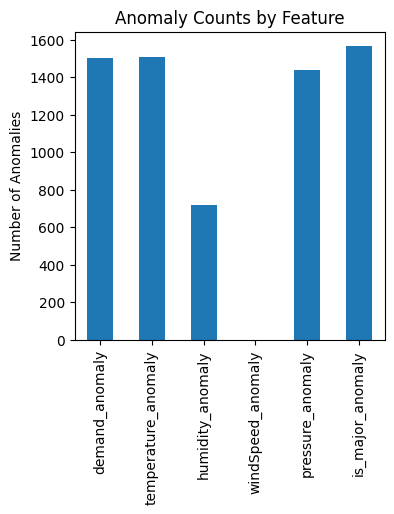

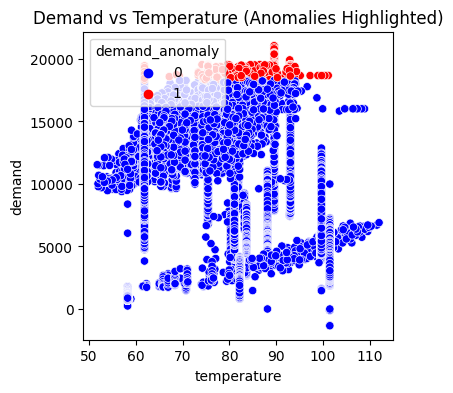


=== Anomaly Report ===
Total rows: 150793
Rows with ≥1 anomaly: 4018
Rows with ≥2 anomalies: 1565


In [10]:
# 1. Select numeric features to analyze for anomalies
features_to_check = [
    'demand',
    'temperature',
    'humidity',
    'windSpeed',
    'pressure'
]

# 2. Detect anomalies per feature using Isolation Forest
for feature in features_to_check:
    if feature in df.columns:
        # Fit Isolation Forest
        clf = IsolationForest(
            contamination=0.01,  # Adjust based on expected anomaly rate
            random_state=42,
            n_estimators=100
        )
        anomalies = clf.fit_predict(df[[feature]].values)

        # Map anomalies: 1=anomaly, 0=normal
        df[f'{feature}_anomaly'] = np.where(anomalies == -1, 1, 0)
        print(f"{feature} anomalies detected: {df[f'{feature}_anomaly'].sum()}")

# 3. Analyze anomalies
# A. Count total anomalies per row
anomaly_cols = [col for col in df.columns if '_anomaly' in col]
df['total_anomalies'] = df[anomaly_cols].sum(axis=1)

# B. Flag rows with multiple anomalies
df['is_major_anomaly'] = (df['total_anomalies'] >= 2).astype(int)

# 4. Visualize anomalies
# A. Plot distribution of anomalies per feature
plt.figure(figsize=(4, 4))
df[anomaly_cols].sum().plot(kind='bar')
plt.title("Anomaly Counts by Feature")
plt.ylabel("Number of Anomalies")
plt.show()

# B. Scatter plot of demand vs temperature (colored by anomalies)
plt.figure(figsize=(4, 4))
sns.scatterplot(
    data=df,
    x='temperature',
    y='demand',
    hue='demand_anomaly',
    palette={0: 'blue', 1: 'red'}
)
plt.title("Demand vs Temperature (Anomalies Highlighted)")
plt.show()

# Impute anomalies with rolling median (per feature)
df = df.copy()
for feature in features_to_check:
    if f'{feature}_anomaly' in df.columns:
        # Impute only anomalous values
        anomaly_mask = (df[f'{feature}_anomaly'] == 1)
        df.loc[anomaly_mask, feature] = df[feature].rolling(24, min_periods=1).median()


# 6. Summary report
print("\n=== Anomaly Report ===")
print(f"Total rows: {len(df)}")
print(f"Rows with ≥1 anomaly: {len(df[df['total_anomalies'] > 0])}")
print(f"Rows with ≥2 anomalies: {len(df[df['is_major_anomaly'] == 1])}")

In [11]:
df.to_csv('/kaggle/working/processed.csv', index=False)

In [12]:
# Split into train and test sets (temporal split)
split_date = df['datetime'].quantile(0.8)  # 80% for training
train = df[df['datetime'] < split_date]
test = df[df['datetime'] >= split_date]

In [13]:
df['precipProbability'].value_counts()
df['windSpeed'].describe()

count    150793.000000
mean          5.802011
std           2.725909
min           1.630000
25%           3.360000
50%           5.450000
75%           7.930000
max          10.840000
Name: windSpeed, dtype: float64

Clustering

In [12]:
# Select relevant features
cluster_features = [
    'demand', 'temperature', 'humidity', 'windSpeed', 
    'precipProbability', 'hour', 'is_weekend'
]

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train[cluster_features])

# Add city information as color labels for visualization
city_labels = train['city'].astype('category').cat.codes

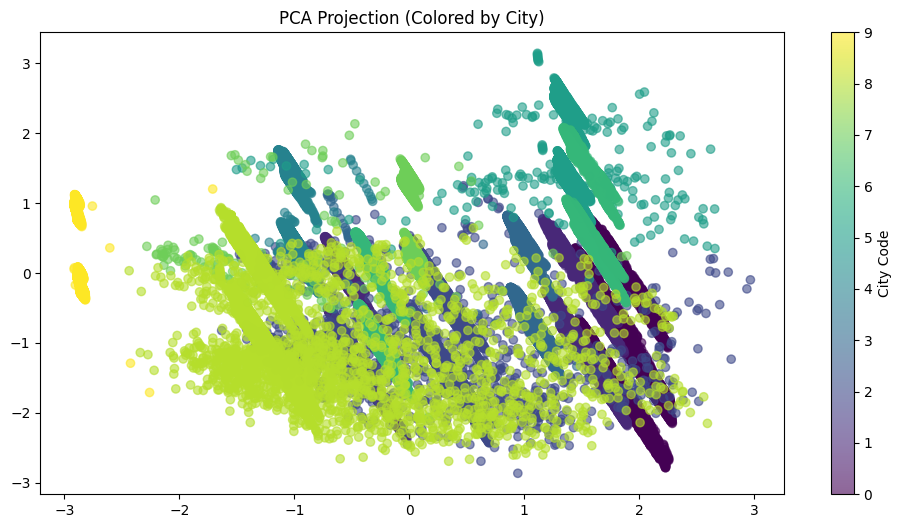

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(12, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=city_labels, alpha=0.6)
plt.title('PCA Projection (Colored by City)')
plt.colorbar(label='City Code')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

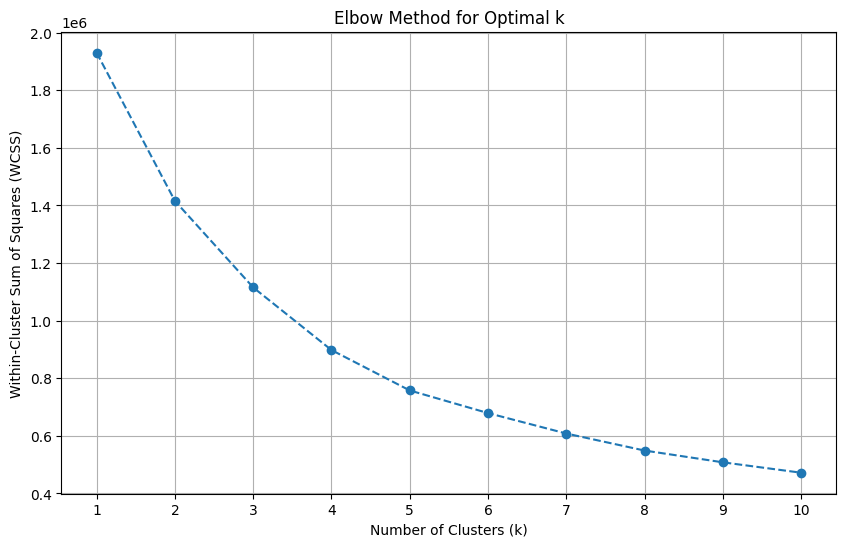

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Get preprocessed numeric features (after scaling)
numeric_features = ['temperature', 'demand', 
                   'apparentTemperature', 'dewPoint', 'humidity', 'pressure',
                   'windSpeed', 'windGust', 'windBearing', 'cloudCover',
                   'uvIndex', 'visibility', 'hour', 'day_of_week', 'month',
                   'demand_lag1', 'demand_rolling_24h']

X_numeric = train[numeric_features].dropna()  # Ensure no missing values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

wcss = []
k_range = range(1, 11)  # Test k from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS (Inertia)

    plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')

plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

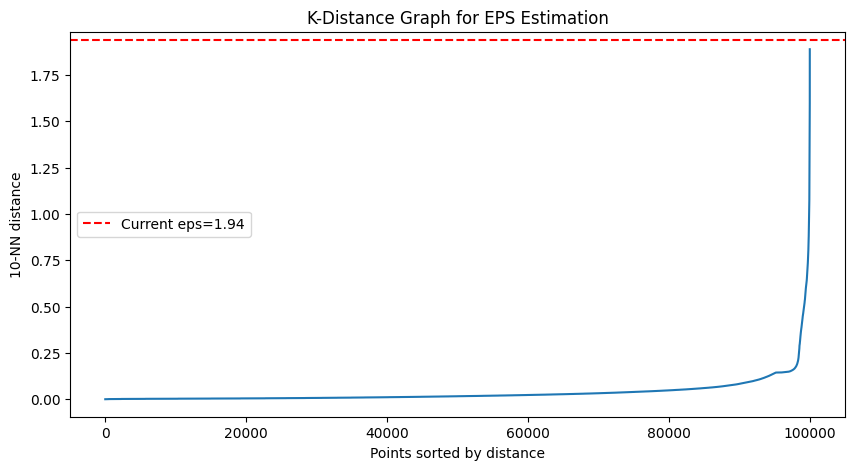

Suggested eps (95th percentile): 0.14


Processing batches: 4it [00:37,  9.33s/it]


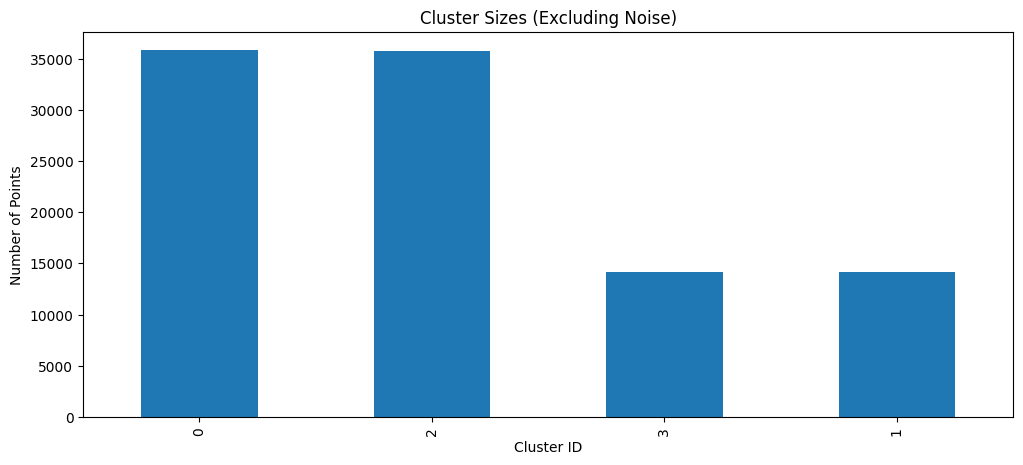

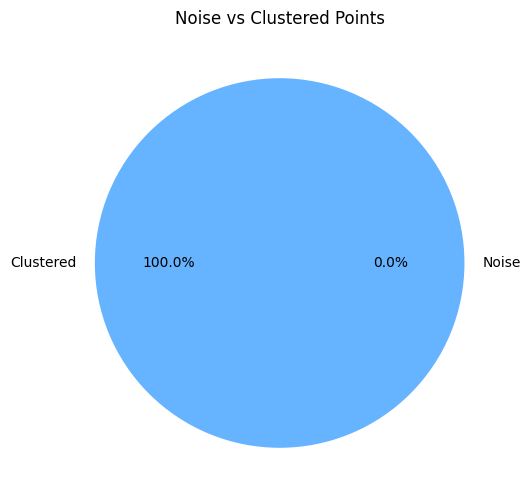

PCA explained variance: 0.54

Batch Processing Statistics:
   batch  n_points  n_clusters  n_noise
0      0     50000           2        0
1      1     50000           2        1
2      2     50000           2        2
3      3       793           2        0

Cluster labels saved to cluster_results.csv


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import joblib
import os
from tqdm import tqdm

# Configuration
CONFIG = {
    "data_path": "/kaggle/working/processed.csv",
    "features":['demand', 'temperature', 'humidity', 'windSpeed','precipProbability', 'hour', 'is_weekend'],
    "chunk_size": 50000,  # Rows per batch
    "mmap_dir": "./tmp_mmap",  # Directory for memory-mapped files
    "eps": 1.94,  # Neighborhood radius (adjust based on your data)
    "min_samples": 10,  # Minimum points in a cluster
    "sample_size": 100000  # For initial parameter estimation
}

def prepare_environment():
    """Create temp directory for memory mapping"""
    os.makedirs(CONFIG['mmap_dir'], exist_ok=True)
    for f in os.listdir(CONFIG['mmap_dir']):
        os.remove(os.path.join(CONFIG['mmap_dir'], f))

def estimate_parameters(data_path):
    """Estimate optimal eps using sample data"""
    sample = pd.read_csv(data_path, nrows=CONFIG['sample_size'])
    X_sample = sample[CONFIG['features']].fillna(sample[CONFIG['features']].median())
    X_scaled = StandardScaler().fit_transform(X_sample)
    
    # K-distance graph for eps estimation
    neigh = NearestNeighbors(n_neighbors=CONFIG['min_samples'])
    neigh.fit(X_scaled)
    distances, _ = neigh.kneighbors(X_scaled)
    k_distances = np.sort(distances[:, -1])
    
    plt.figure(figsize=(10, 5))
    plt.plot(k_distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'{CONFIG["min_samples"]}-NN distance')
    plt.title('K-Distance Graph for EPS Estimation')
    plt.axhline(y=CONFIG['eps'], color='r', linestyle='--', 
               label=f'Current eps={CONFIG["eps"]}')
    plt.legend()
    plt.show()
    
    suggested_eps = np.percentile(k_distances, 95)
    print(f"Suggested eps (95th percentile): {suggested_eps:.2f}")
    return X_scaled.shape[1]  # Return number of features

def process_batches(data_path):
    """Main batch processing pipeline"""
    n_features = estimate_parameters(data_path)
    chunk_iterator = pd.read_csv(data_path, chunksize=CONFIG['chunk_size'])
    all_labels = []
    batch_stats = []
    
    for batch_num, chunk in enumerate(tqdm(chunk_iterator, desc="Processing batches")):
        # Preprocess
        X_batch = chunk[CONFIG['features']].fillna(chunk[CONFIG['features']].median())
        X_scaled = StandardScaler().fit_transform(X_batch)
        
        # Memory mapping
        mmap_path = f"{CONFIG['mmap_dir']}/batch_{batch_num}.mmap"
        joblib.dump(X_scaled, mmap_path)
        X_mmap = joblib.load(mmap_path, mmap_mode='r')
        
        # DBSCAN
        db = DBSCAN(
            eps=CONFIG['eps'],
            min_samples=CONFIG['min_samples'],
            metric='euclidean',
            n_jobs=-1
        ).fit(X_mmap)
        
        # Offset cluster IDs
        labels = db.labels_
        if batch_num > 0:
            max_prev = np.max(all_labels)
            labels[labels != -1] += max_prev + 1
        
        all_labels.extend(labels)
        batch_stats.append({
            'batch': batch_num,
            'n_points': len(X_batch),
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0),
            'n_noise': np.sum(labels == -1)
        })
    
    return all_labels, pd.DataFrame(batch_stats)

def visualize_results(df, labels):
    """Generate diagnostic visualizations"""
    df['cluster'] = labels
    
    # 1. Cluster distribution
    plt.figure(figsize=(12, 5))
    cluster_counts = df['cluster'].value_counts()
    cluster_counts[cluster_counts.index != -1].plot(kind='bar')
    plt.title('Cluster Sizes (Excluding Noise)')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Points')
    plt.show()
    
    # 2. Noise vs. clustered points
    noise_ratio = (df['cluster'] == -1).mean()
    plt.figure(figsize=(6, 6))
    plt.pie(
        [noise_ratio, 1 - noise_ratio],
        labels=['Noise', 'Clustered'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff']
    )
    plt.title('Noise vs Clustered Points')
    plt.show()
    
    # 3. 2D Projection (PCA for high-dim data)
    from sklearn.decomposition import PCA
    
    numeric_cols = [c for c in CONFIG['features'] if c in df.columns]
    X_vis = df[numeric_cols].fillna(df[numeric_cols].median())
    X_vis = StandardScaler().fit_transform(X_vis)
    
    if len(numeric_cols) > 2:
        pca = PCA(n_components=2)
        X_vis = pca.fit_transform(X_vis)
        print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.2f}")


def main():
    prepare_environment()
    
    # Process data in batches
    labels, batch_stats = process_batches(CONFIG['data_path'])
    
    # Load full dataset (if manageable) or sample for visualization
    try:
        df = pd.read_csv(CONFIG['data_path'], nrows=100000)  # Sample for viz
        visualize_results(df, labels[:100000])
    except MemoryError:
        print("Visualization skipped - dataset too large for memory")
    
    # Save results
    print("\nBatch Processing Statistics:")
    print(batch_stats)
    
    # Save cluster labels (in batches if needed)
    output_path = "cluster_results.csv"
    if len(labels) < 1e6:  # If not too large
        pd.DataFrame({'cluster': labels}).to_csv(output_path, index=False)
        print(f"\nCluster labels saved to {output_path}")
    else:
        print("\nCluster labels too large to save as single file")
        print("Consider saving batch-wise or using database storage")

if __name__ == "__main__":
    main()


Generating dendrogram...


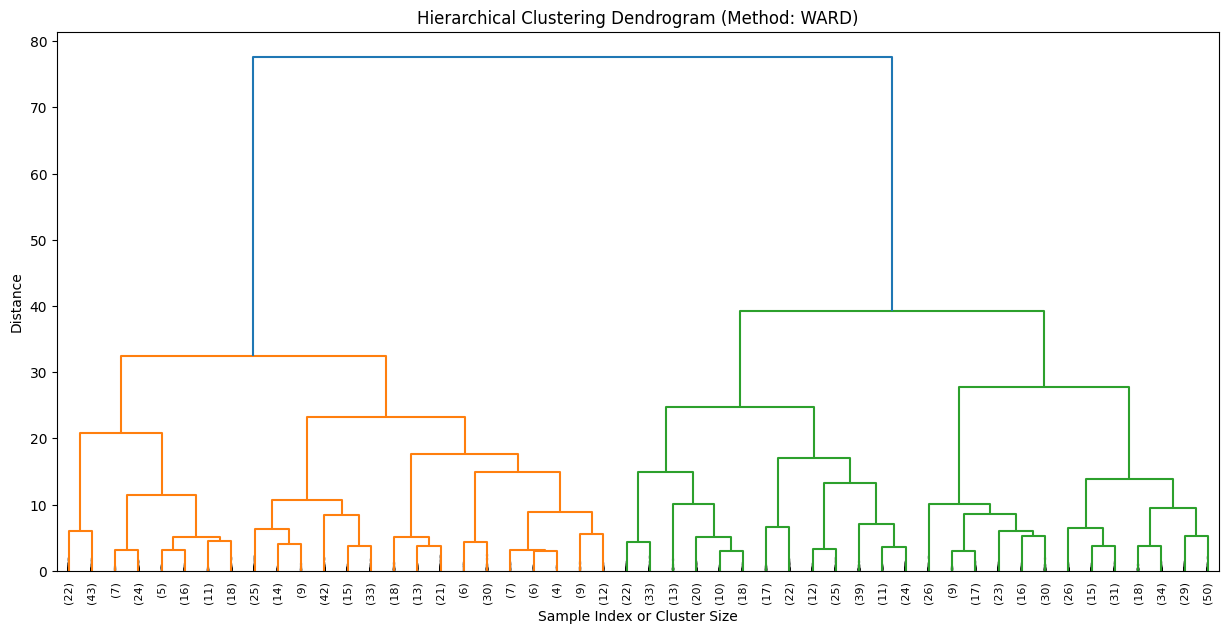

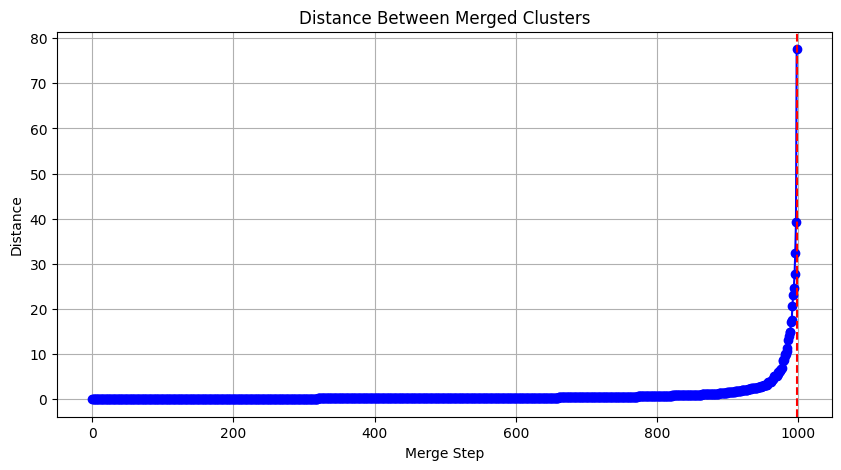


Suggested cutoff distance: 77.54


Enter cutoff distance [suggested: 77.54]:  77.54


Processing batches: 4it [07:37, 114.31s/it]


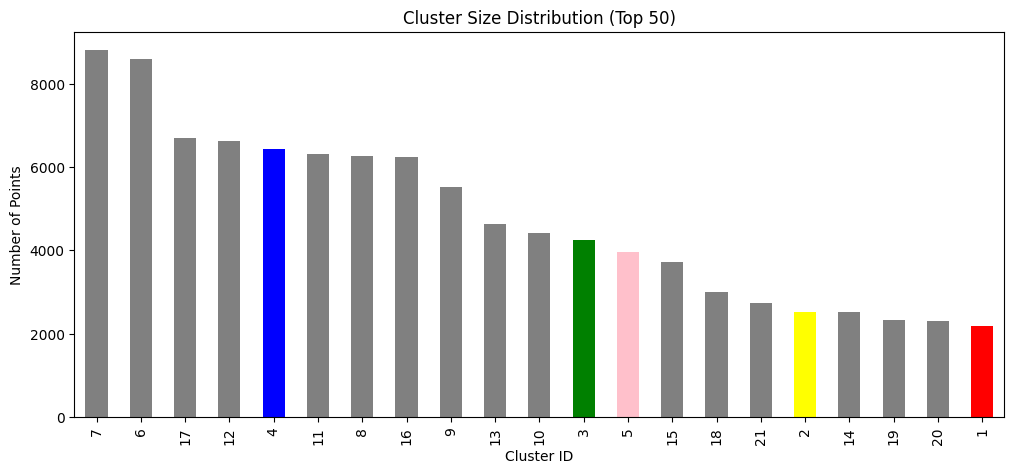

PCA explained variance: 0.53


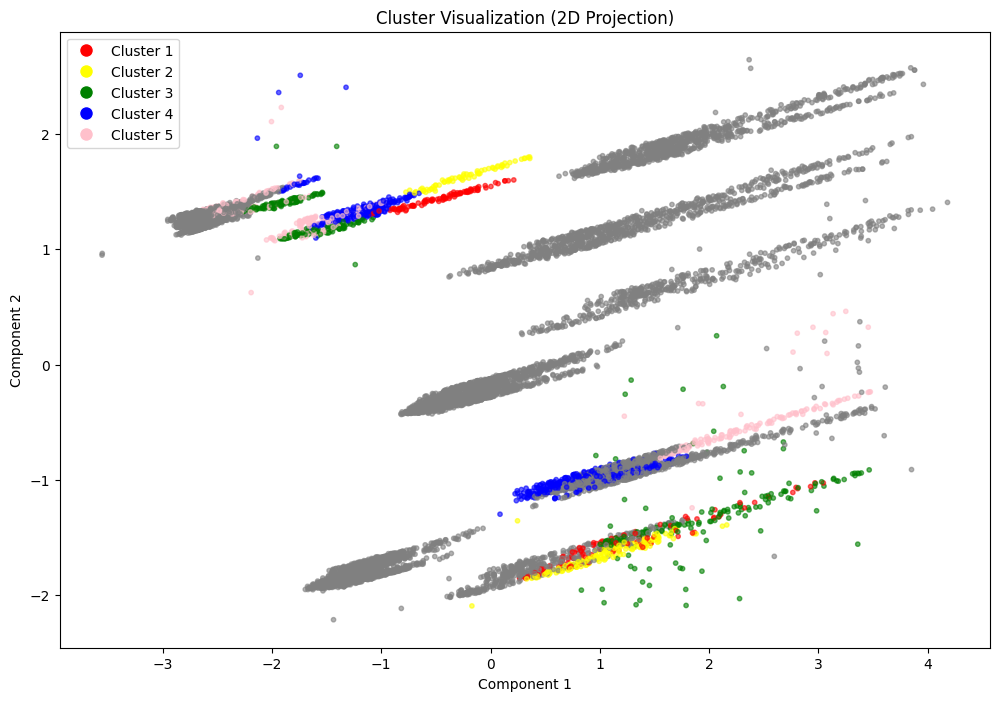

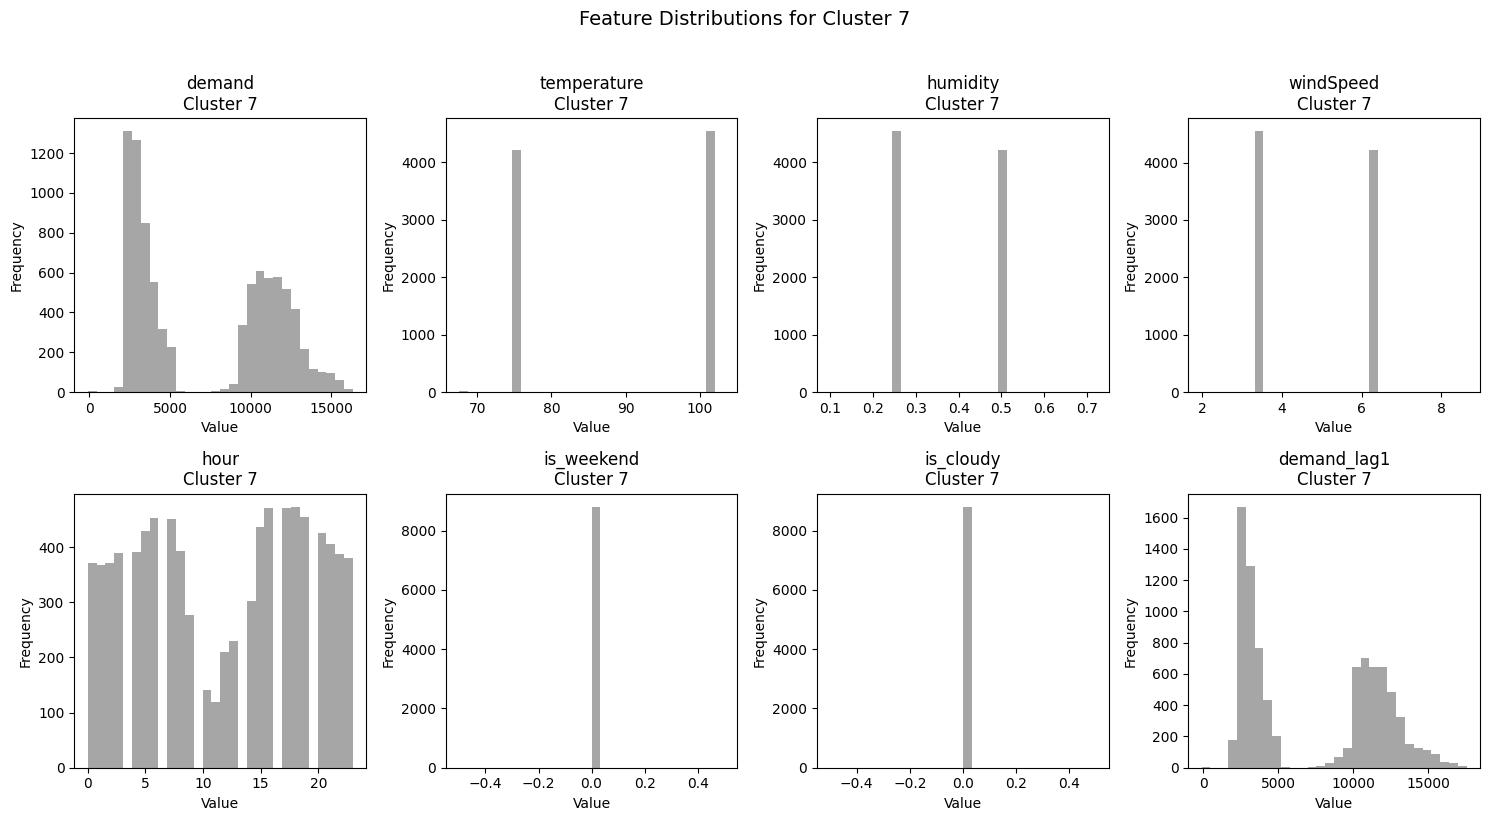

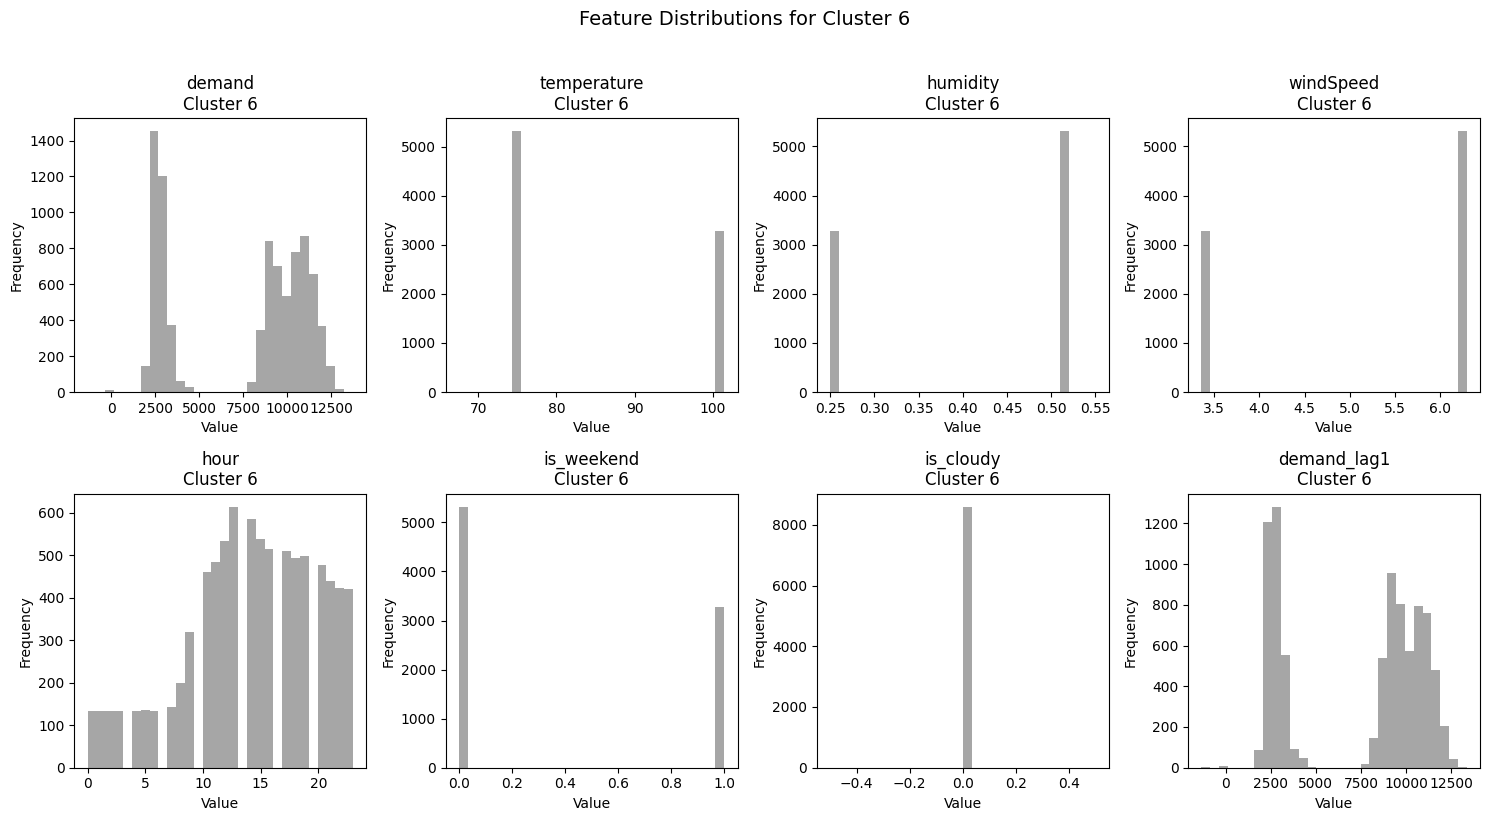

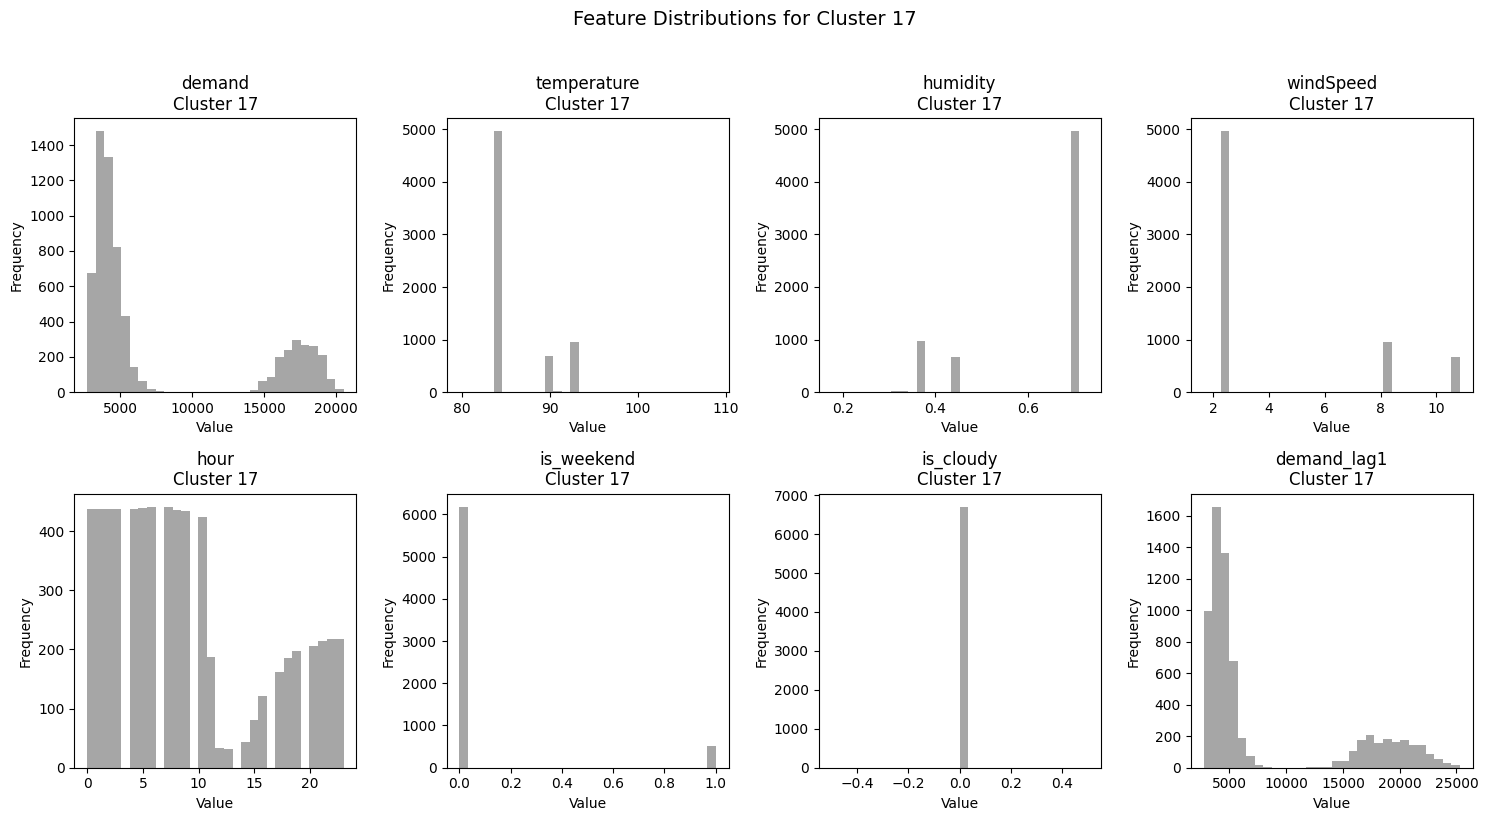

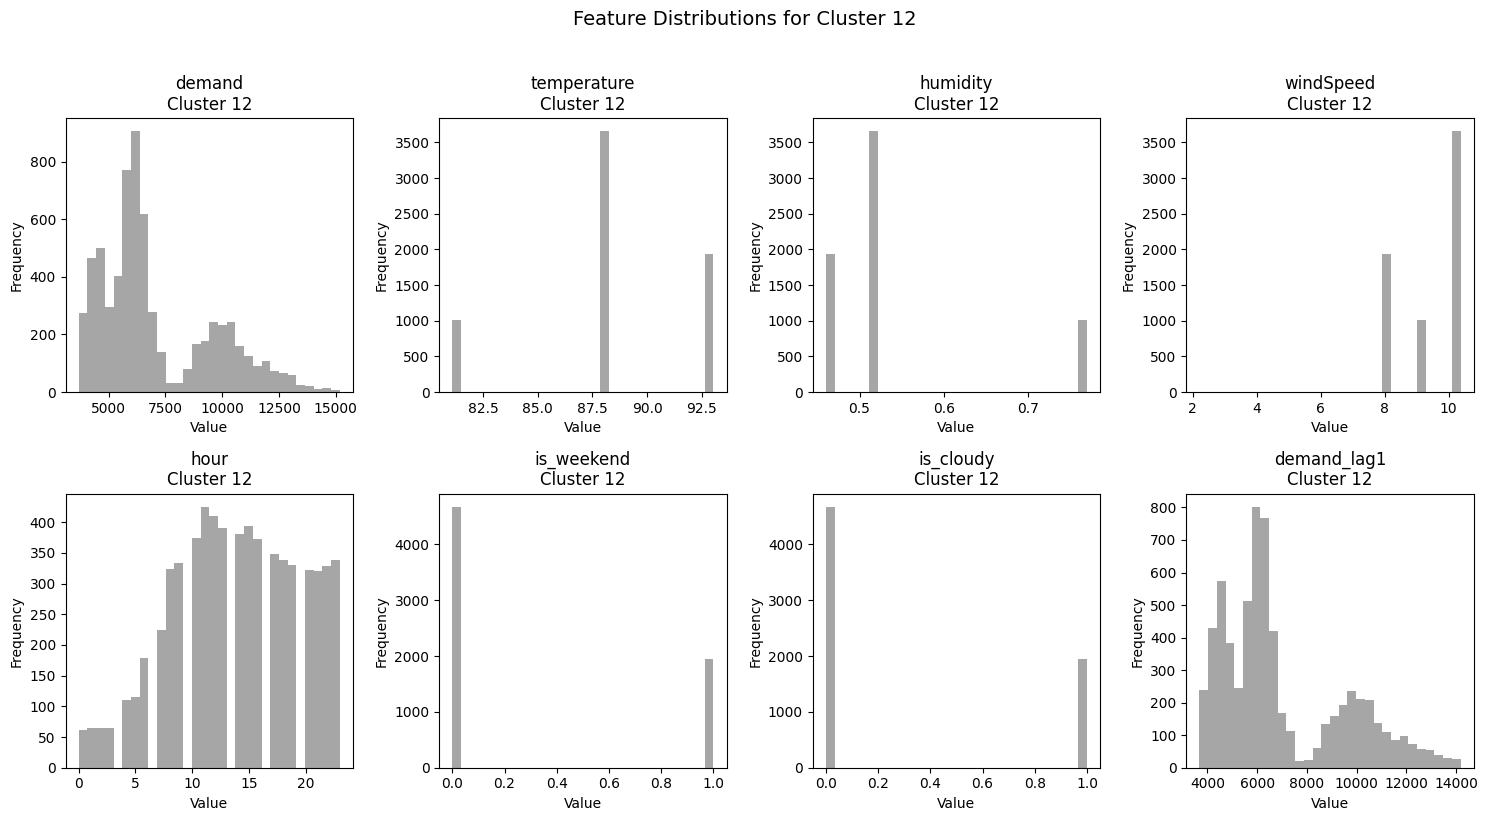

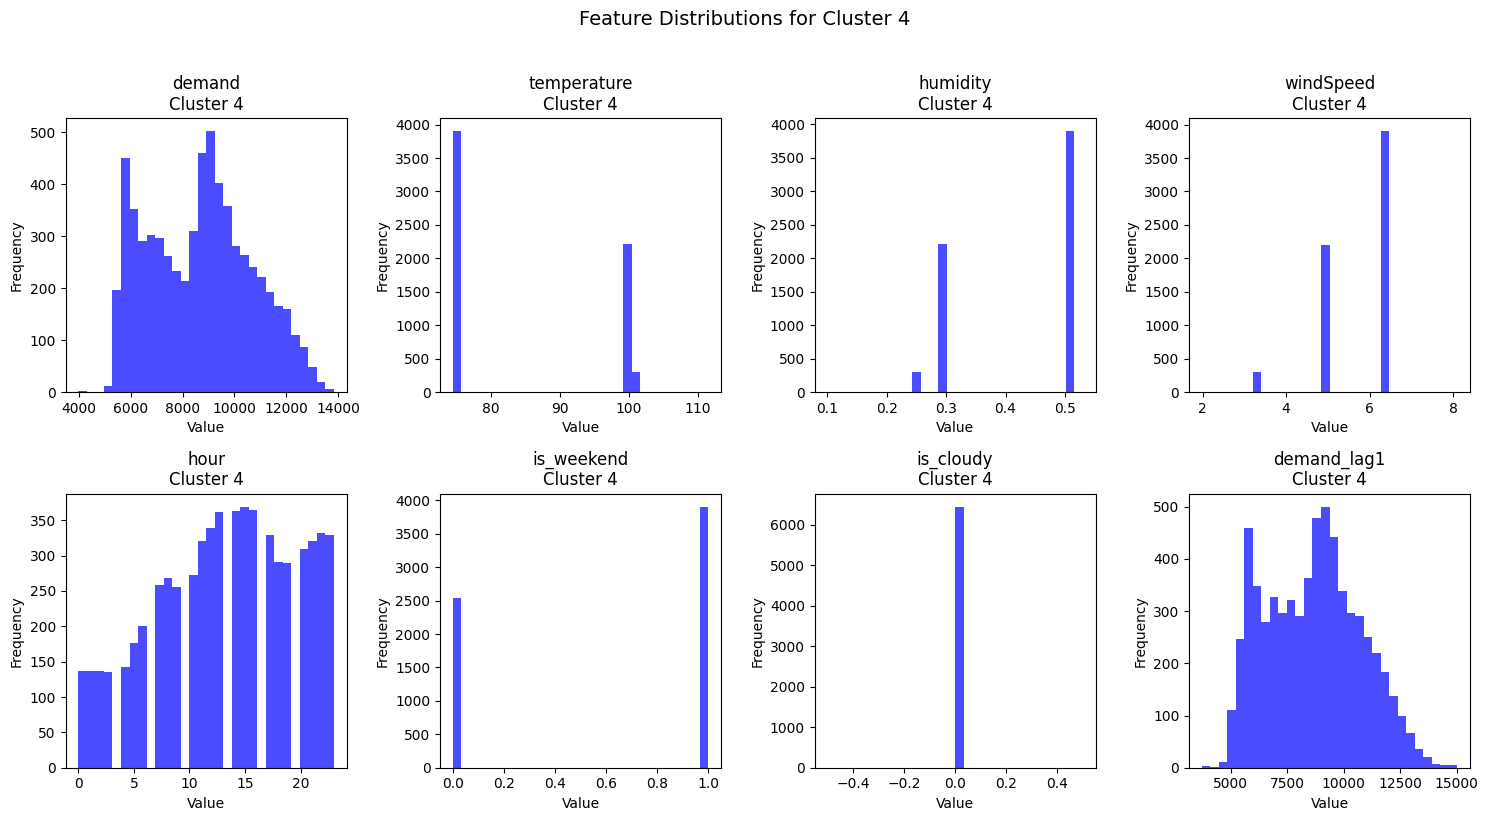


Cluster assignments saved to hierarchical_clusters.csv


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import os
from tqdm import tqdm

# Configuration
CONFIG = {
    "data_path": "/kaggle/working/processed.csv",
    "features": ['demand', 'temperature', 'humidity', 'windSpeed', 'hour', 'is_weekend','is_cloudy', 'demand_lag1'],
    "sample_size": 10000,
    "batch_size": 50000,
    "max_cluster_samples": 1000,
    "linkage_method": "ward",
    "distance_metric": "euclidean",
    "cluster_colors": {
        1: 'red',
        2: 'yellow',
        3: 'green',
        4: 'blue',
        5: 'pink'
    }
}

def load_and_sample():
    """Load data and create representative sample"""
    sample = pd.read_csv(CONFIG['data_path'], nrows=CONFIG['sample_size'])
    sample = sample[CONFIG['features']].dropna()
    scaler = StandardScaler()
    X_sample = scaler.fit_transform(sample)
    return X_sample, sample.index

def generate_dendrogram(X):
    """Generate and display dendrogram from sample data"""
    print("\nGenerating dendrogram...")
    
    if len(X) > CONFIG['max_cluster_samples']:
        idx = np.random.choice(len(X), CONFIG['max_cluster_samples'], replace=False)
        X = X[idx]
    
    Z = linkage(
        X,
        method=CONFIG['linkage_method'],
        metric=CONFIG['distance_metric']
    )
    
    plt.figure(figsize=(15, 7))
    dendrogram(
        Z,
        truncate_mode='lastp',
        p=50,
        show_leaf_counts=True,
        leaf_rotation=90,
        leaf_font_size=8,
        show_contracted=True
    )
    plt.title(f'Hierarchical Clustering Dendrogram (Method: {CONFIG["linkage_method"].upper()})')
    plt.xlabel('Sample Index or Cluster Size')
    plt.ylabel('Distance')
    plt.show()
    
    return Z

def batch_clustering(data_path, cutoff_distance):
    """Process full dataset in batches using chosen cutoff"""
    chunk_iterator = pd.read_csv(data_path, chunksize=CONFIG['batch_size'])
    all_labels = np.array([], dtype=np.int32)
    max_prev = 0
    
    for chunk in tqdm(chunk_iterator, desc="Processing batches"):
        X_batch = chunk[CONFIG['features']].dropna()
        if len(X_batch) == 0:
            all_labels = np.concatenate([all_labels, np.full(len(chunk), -1, dtype=np.int32)])
            continue
            
        X_scaled = StandardScaler().fit_transform(X_batch)
        
        Z_batch = linkage(
            X_scaled,
            method=CONFIG['linkage_method'],
            metric=CONFIG['distance_metric']
        )
        labels = fcluster(Z_batch, t=cutoff_distance, criterion='distance').astype(np.int32)
        
        # Offset cluster IDs
        if len(all_labels) > 0:
            labels[labels != -1] += max_prev
            max_prev = labels.max()
        
        # Align with original indices
        chunk_labels = np.full(len(chunk), -1, dtype=np.int32)
        chunk_labels[X_batch.index - chunk.index[0]] = labels
        all_labels = np.concatenate([all_labels, chunk_labels])
    
    return all_labels

def visualize_clusters(df, labels):
    """Visualize clustering results with custom colors"""
    df['cluster'] = labels
    
    # 1. Cluster size distribution
    plt.figure(figsize=(12, 5))
    cluster_counts = df['cluster'].value_counts()
    (cluster_counts[cluster_counts.index != -1]
     .head(50)
     .plot(kind='bar', color=[CONFIG['cluster_colors'].get(i, 'gray') for i in cluster_counts.head(50).index]))
    plt.title('Cluster Size Distribution (Top 50)')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Points')
    plt.show()
    
    # 2. 2D Projection with custom colors
    from sklearn.decomposition import PCA
    
    numeric_cols = [c for c in CONFIG['features'] if c in df.columns]
    X_vis = df[numeric_cols].dropna()
    if len(X_vis) > 10000:
        X_vis = X_vis.sample(10000, random_state=42)
    
    X_scaled = StandardScaler().fit_transform(X_vis)
    cluster_labels = df.loc[X_vis.index, 'cluster']
    
    if len(numeric_cols) > 2:
        pca = PCA(n_components=2)
        X_vis = pca.fit_transform(X_scaled)
        print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.2f}")
    
    plt.figure(figsize=(12, 8))
    colors = [CONFIG['cluster_colors'].get(l, 'gray') for l in cluster_labels]
    plt.scatter(
        X_vis[:, 0],
        X_vis[:, 1],
        c=colors,
        alpha=0.6,
        s=10
    )
    
    # Create legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                      markerfacecolor=color, markersize=10) 
                     for i, color in CONFIG['cluster_colors'].items()]
    plt.legend(handles=legend_elements)
    
    plt.title('Cluster Visualization (2D Projection)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()
    
    # 3. Feature distributions per cluster (top 5 clusters)
    top_clusters = cluster_counts[cluster_counts.index != -1].head(5).index
    for cluster in top_clusters:
        plt.figure(figsize=(15, 8))
        cluster_data = df[df['cluster'] == cluster]
        
        for i, feature in enumerate(numeric_cols, 1):
            plt.subplot(2, 4, i)
            plt.hist(cluster_data[feature], bins=30, 
                    color=CONFIG['cluster_colors'].get(cluster, 'gray'), alpha=0.7)
            plt.title(f'{feature}\nCluster {cluster}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
        
        plt.suptitle(f'Feature Distributions for Cluster {cluster}', y=1.02, fontsize=14)
        plt.tight_layout()
        plt.show()

def main():
    # Step 1: Load sample and generate dendrogram
    X_sample, _ = load_and_sample()
    Z = generate_dendrogram(X_sample)
    
    # Step 2: Determine cutoff distance
    distances = Z[:, 2]
    distance_diff = np.diff(distances)
    optimal_idx = np.argmax(distance_diff) + 1
    suggested_cutoff = distances[optimal_idx]
    
    plt.figure(figsize=(10, 5))
    plt.plot(distances, 'b-', marker='o')
    plt.axvline(x=optimal_idx, color='r', linestyle='--')
    plt.title('Distance Between Merged Clusters')
    plt.xlabel('Merge Step')
    plt.ylabel('Distance')
    plt.grid()
    plt.show()
    
    print(f"\nSuggested cutoff distance: {suggested_cutoff:.2f}")
    user_cutoff = float(input(f"Enter cutoff distance [suggested: {suggested_cutoff:.2f}]: ") or suggested_cutoff)
    
    # Step 3: Process full dataset in batches
    labels = batch_clustering(CONFIG['data_path'], user_cutoff)
    
    # Step 4: Visualize results
    try:
        df_viz = pd.read_csv(CONFIG['data_path'], nrows=100000)
        visualize_clusters(df_viz, labels[:100000])
    except MemoryError:
        print("Visualization skipped - dataset too large")
    
    # Save results
    output_path = "hierarchical_clusters.csv"
    pd.DataFrame({'cluster': labels}).to_csv(output_path, index=False)
    print(f"\nCluster assignments saved to {output_path}")

if __name__ == "__main__":
    main()


=== CLUSTERING EVALUATION METRICS ===
Silhouette Score (cosine): 0.7932
Calinski-Harabasz Index: 951297.28
Davies-Bouldin Index: 0.4814

Cluster Sizes:
0    67022
1    10977
2    14267
3    38814
4    19713
Name: count, dtype: int64

Total points clustered: 150793


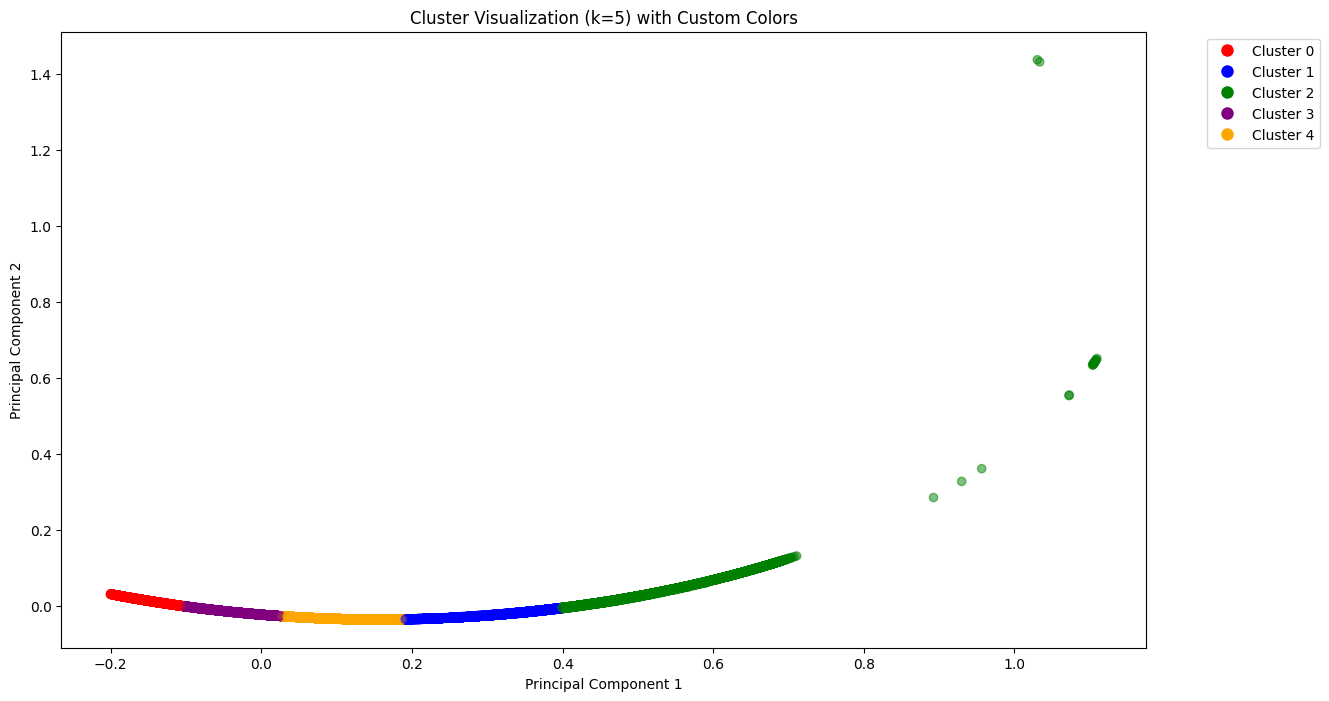

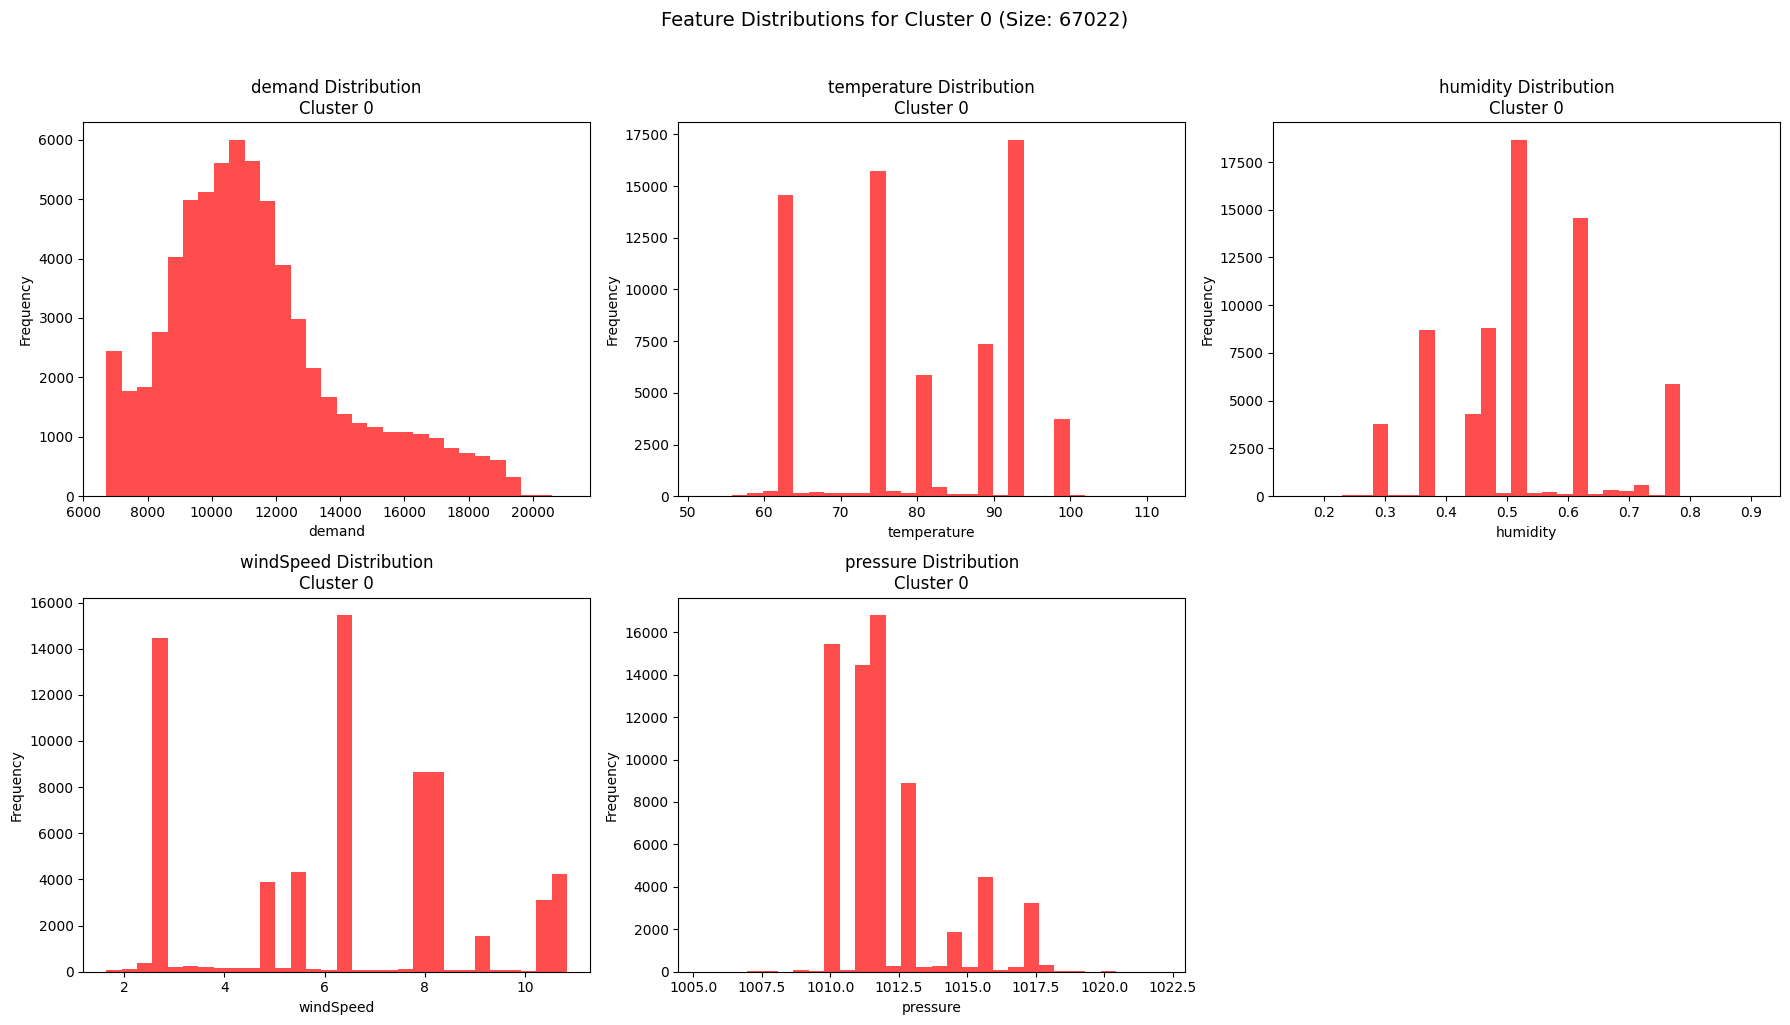

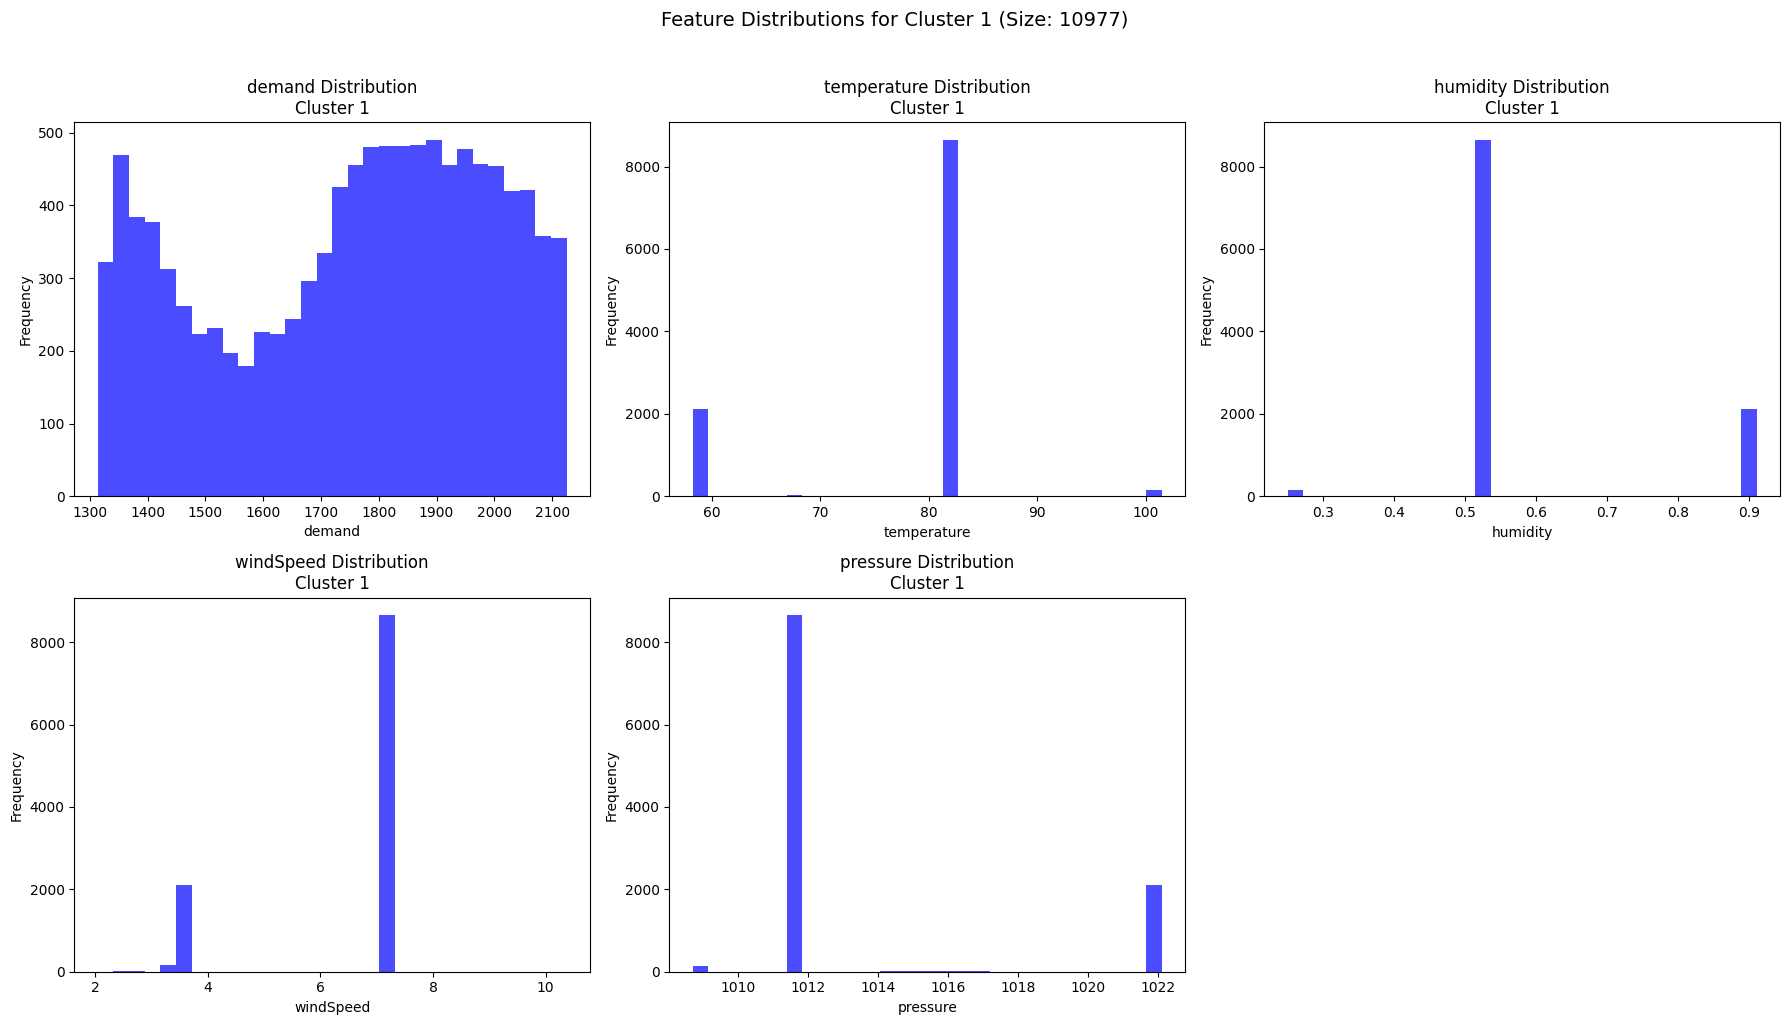

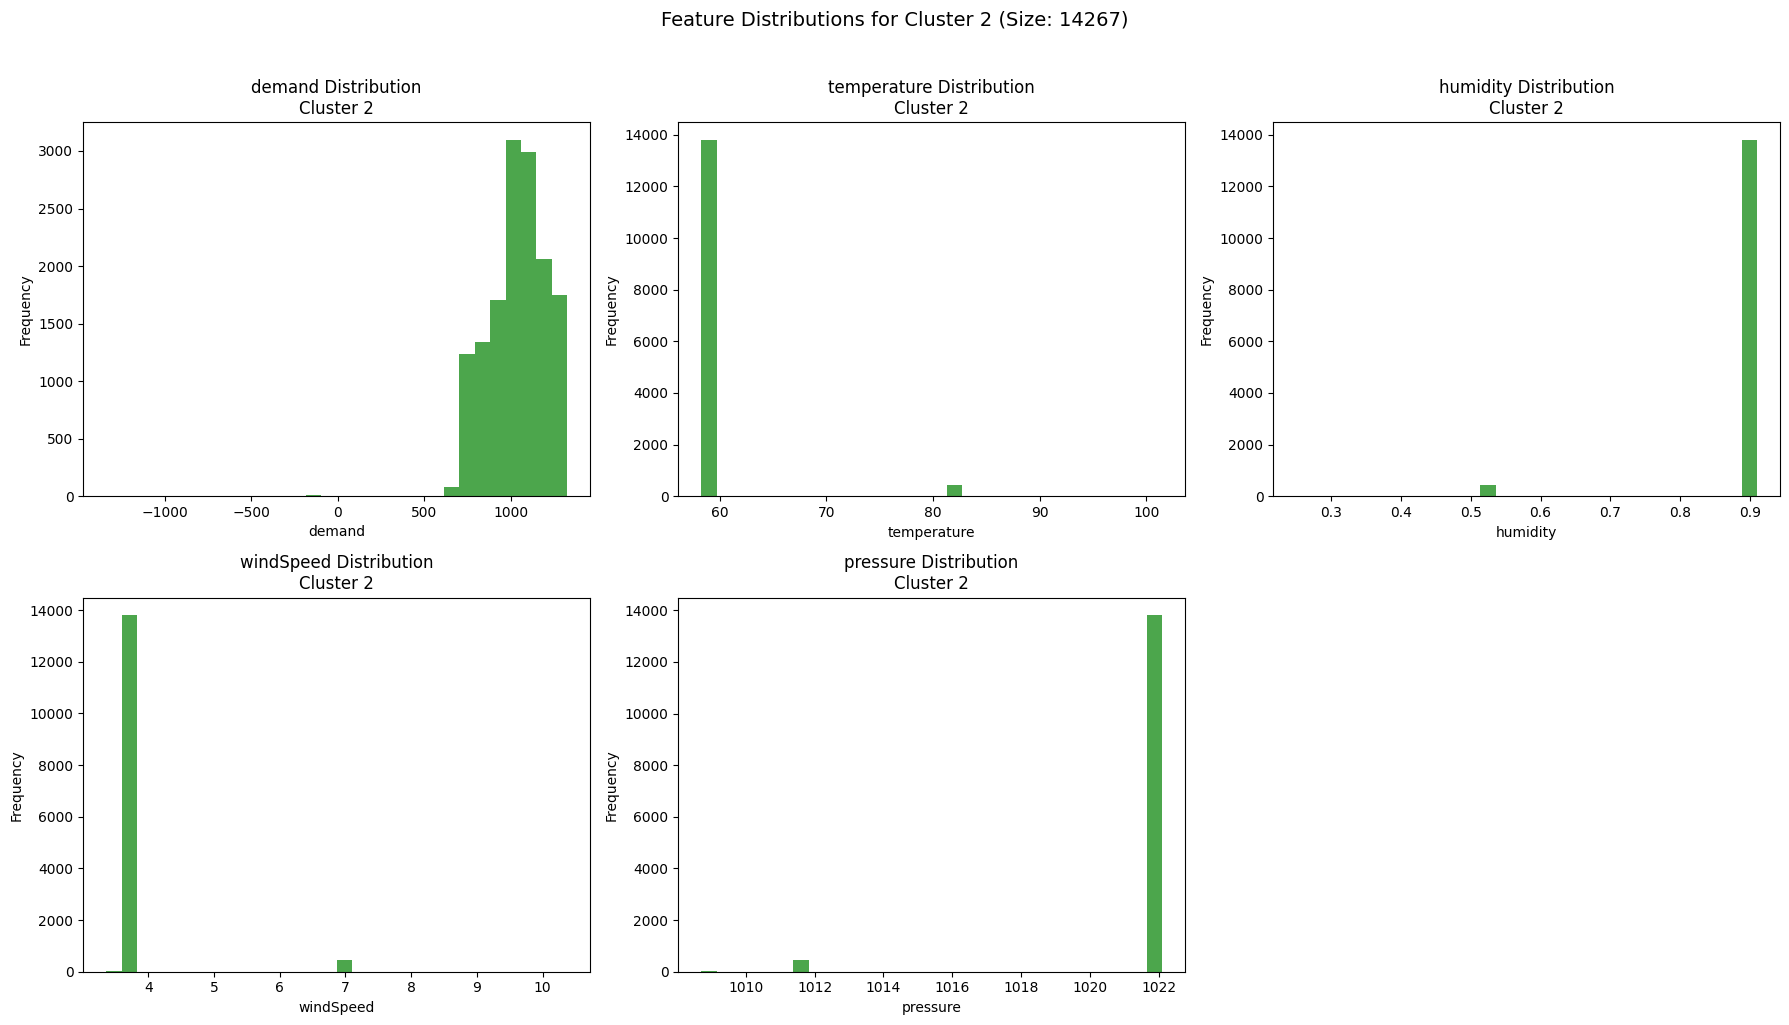

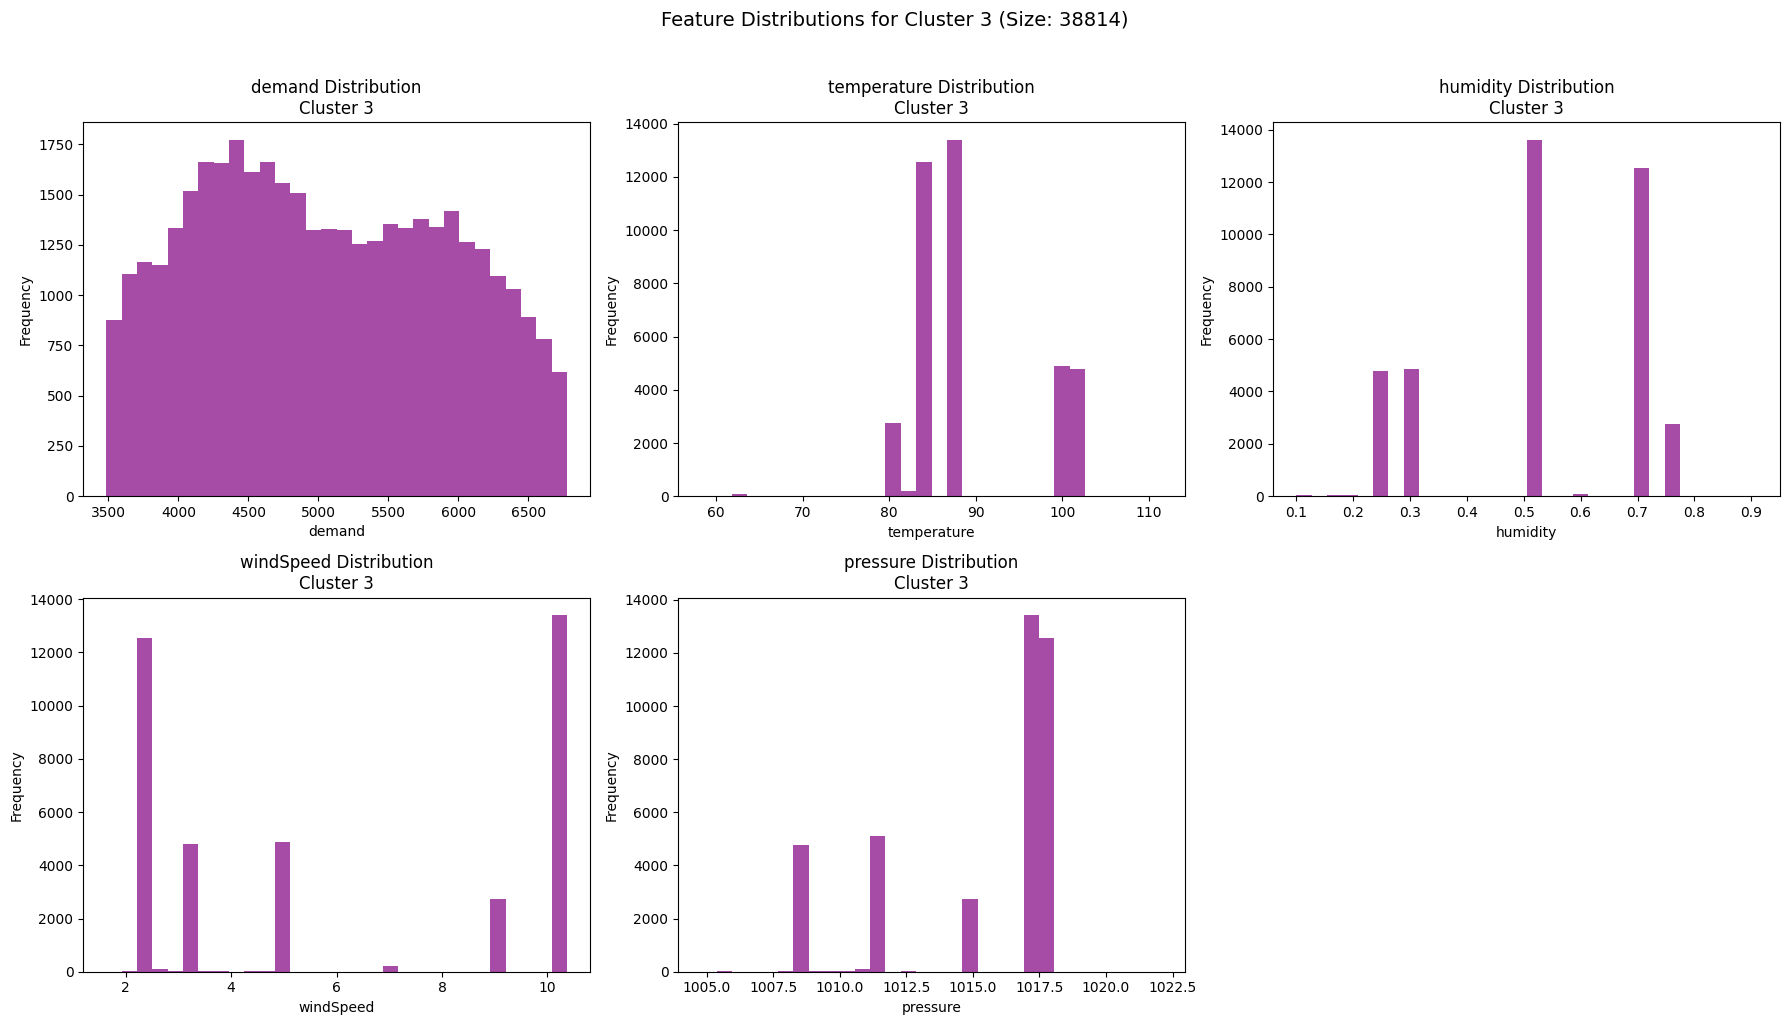

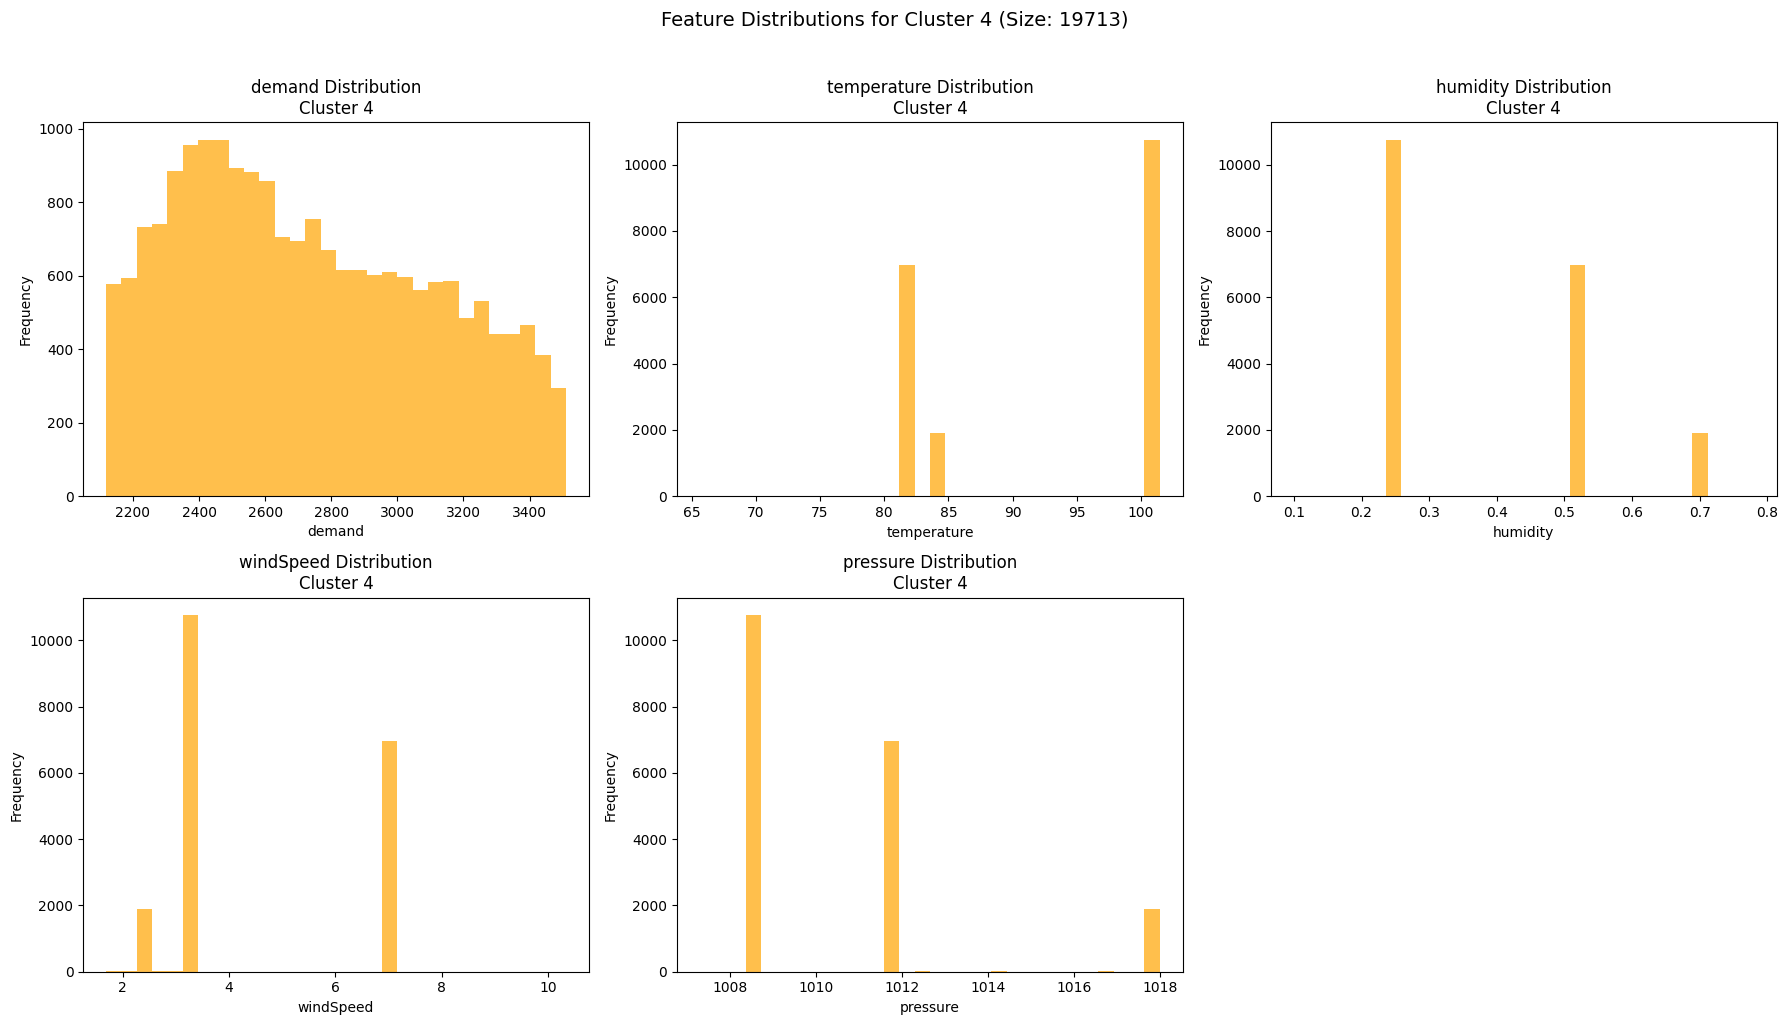


=== CLUSTER STATISTICS ===
               demand                     temperature                    \
                 mean          std  count        mean        std  count   
cluster                                                                   
0        11384.210879  2751.538059  67022   80.302396  12.478602  67022   
1         1752.995901   233.875474  10977   77.762119   9.841339  10977   
2         1038.754538   165.330141  14267   59.068424   4.438036  14267   
3         5044.641580   877.625466  38814   89.226069   7.040813  38814   
4         2731.779891   373.481101  19713   92.807040   9.507329  19713   

         humidity                  windSpeed                      pressure  \
             mean       std  count      mean       std  count         mean   
cluster                                                                      
0        0.517431  0.123828  67022  6.320661  2.551574  67022  1011.932733   
1        0.600077  0.155109  10977  6.359685  1.406715  109

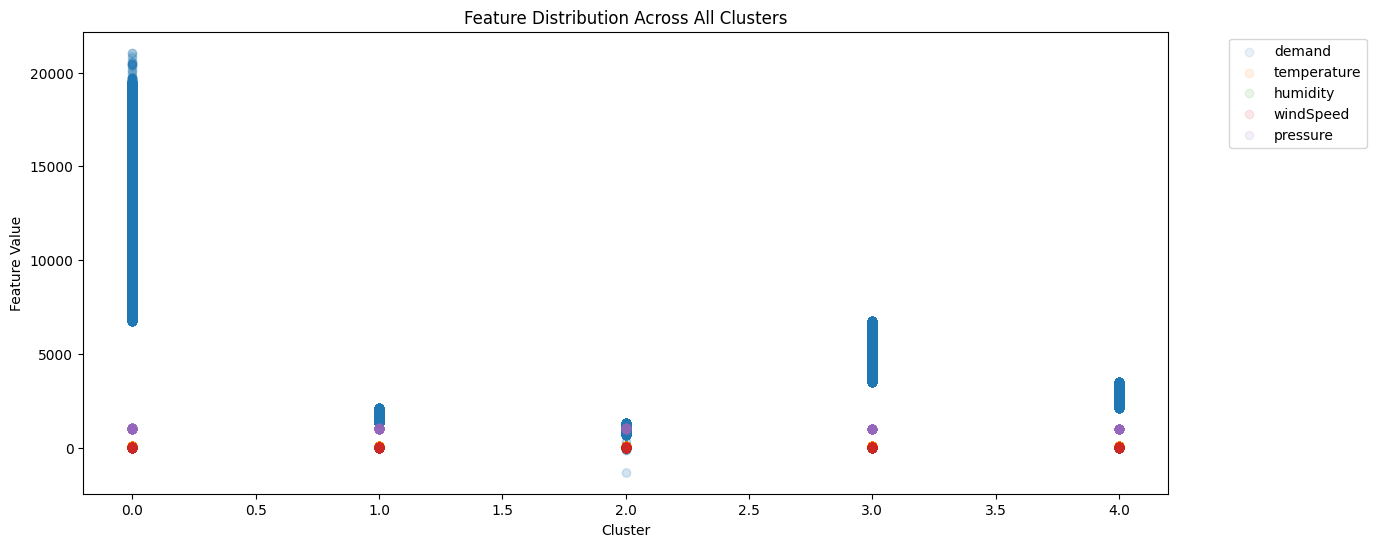

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configuration
CONFIG = {
    "data_path": "/kaggle/working/processed.csv",
    "features": ['demand', 'temperature', 'humidity', 'windSpeed', 'pressure'],
    "n_clusters": 5,
    "cluster_colors": {
        0: 'red',
        1: 'blue',
        2: 'green',
        3: 'purple',
        4: 'orange'
    }
}

# Load and normalize data
df = pd.read_csv(CONFIG['data_path'])
train_df = df[CONFIG['features']].copy()
train_normalized = normalize(train_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=CONFIG['n_clusters'], random_state=42)
cluster_labels = kmeans.fit_predict(train_normalized)
train_df['cluster'] = cluster_labels

# Evaluation Metrics
def print_evaluation_metrics(X, labels):
    print("\n=== CLUSTERING EVALUATION METRICS ===")
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X, labels, metric='cosine')
        print(f"Silhouette Score (cosine): {silhouette:.4f}")
    else:
        print("Silhouette Score: Not computable (only 1 cluster)")

    ch_score = calinski_harabasz_score(X, labels)
    print(f"Calinski-Harabasz Index: {ch_score:.2f}")
    
    db_score = davies_bouldin_score(X, labels)
    print(f"Davies-Bouldin Index: {db_score:.4f}")
    
    cluster_counts = pd.Series(labels).value_counts().sort_index()
    print("\nCluster Sizes:")
    print(cluster_counts)
    print(f"\nTotal points clustered: {len(labels)}")

print_evaluation_metrics(train_normalized, cluster_labels)

# Visualize clusters
def visualize_clusters(data, labels, features):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    colors = [CONFIG['cluster_colors'][label] for label in labels]
    plt.figure(figsize=(14, 8))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors, alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Cluster Visualization (k={CONFIG["n_clusters"]}) with Custom Colors')
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                      markerfacecolor=color, markersize=10) 
                     for i, color in CONFIG['cluster_colors'].items()]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

visualize_clusters(train_normalized, cluster_labels, CONFIG['features'])

# Feature distributions
def plot_feature_distributions(df, features, cluster_col='cluster'):
    for cluster in range(CONFIG['n_clusters']):
        plt.figure(figsize=(18, 10))
        cluster_data = df[df[cluster_col] == cluster]
        for i, feature in enumerate(features, 1):
            plt.subplot(2, 3, i)
            plt.hist(cluster_data[feature], bins=30, color=CONFIG['cluster_colors'][cluster], alpha=0.7)
            plt.title(f'{feature} Distribution\nCluster {cluster}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
        plt.suptitle(f'Feature Distributions for Cluster {cluster} (Size: {len(cluster_data)})', 
                     y=1.02, fontsize=14)
        plt.tight_layout()
        plt.show()

plot_feature_distributions(train_df, CONFIG['features'])

# Cluster statistics
def analyze_clusters(df, cluster_col='cluster'):
    cluster_stats = df.groupby(cluster_col).agg(['mean', 'std', 'count'])
    print("\n=== CLUSTER STATISTICS ===")
    print(cluster_stats)
    
    plt.figure(figsize=(14, 6))
    for feature in CONFIG['features']:
        plt.scatter(df[cluster_col], df[feature], alpha=0.1, label=feature)
    plt.title('Feature Distribution Across All Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Feature Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

analyze_clusters(train_df)


# Predictive Modelling

In [15]:
df.describe()

,datetime,demand,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,...,is_windy,demand_lag1,demand_rolling_24h,demand_anomaly,temperature_anomaly,humidity_anomaly,windSpeed_anomaly,pressure_anomaly,total_anomalies,is_major_anomaly
count,150793,150793.000000,150793.0,150793.0,150793.000000,150793.000000,150793.000000,150793.000000,150793.000000,150793.000000,...,150793.0,150783.000000,150793.000000,150793.000000,150793.000000,150793.000000,150793.000000,150793.000000,150793.000000,150793.000000
mean,2019-06-03 02:31:26.196308736,6941.366137,0.0,0.0,82.040128,84.158036,62.188491,0.548464,1013.723600,5.802011,...,0.0,6982.420344,6983.015717,0.009934,0.010000,0.008382,0.001479,0.009729,0.039524,0.009072
min,2018-01-01 00:00:00,-1340.000000,0.0,0.0,51.770000,51.770000,19.970000,0.100000,1004.800000,1.630000,...,0.0,-1340.000000,763.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-12-08 05:00:00,2857.000000,0.0,0.0,75.430000,75.430000,56.030000,0.450000,1011.000000,3.360000,...,0.0,2857.000000,2820.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-07-04 21:00:00,5895.570000,0.0,0.0,83.670000,90.230000,62.580000,0.520000,1011.700000,5.450000,...,0.0,5896.000000,5691.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019-12-09 13:00:00,10600.000000,0.0,0.0,92.890000,93.560000,68.550000,0.710000,1017.100000,7.930000,...,0.0,10600.000000,10676.323750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020-05-20 07:00:00,21061.710000,0.0,0.0,111.980000,111.980000,74.150000,0.910000,1022.100000,10.840000,...,0.0,101412.000000,21158.292917,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
std,NaN,4567.270399,0.0,0.0,13.555328,14.551518,7.579870,0.189696,4.081372,2.725909,...,0.0,4680.705108,4516.603660,0.099174,0.099501,0.091171,0.038427,0.098153,0.254859,0.094815


In [24]:
import pandas as pd

df = pd.read_csv("/kaggle/working/processed.csv")
print(df.columns)


Index(['datetime', 'city', 'demand', 'data_source', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility', 'icon', 'summary', 'hour',
       'day_of_week', 'month', 'is_weekend', 'season', 'weather_severity',
       'is_rainy', 'is_cloudy', 'is_windy', 'temp_bin', 'time_of_day',
       'demand_lag1', 'demand_rolling_24h', 'demand_anomaly',
       'temperature_anomaly', 'humidity_anomaly', 'windSpeed_anomaly',
       'pressure_anomaly', 'total_anomalies', 'is_major_anomaly'],
      dtype='object')


Data loaded with shape: (150793, 38)
Date range: 2018-01-01 00:00:00 to 2020-05-20 07:00:00

Test period starts at: 2020-04-20 07:00:00
Naive Baseline Performance:
MAE: 272.09
RMSE: 371.02
MAPE: 3.92%

Fitting 3 folds for each of 8 candidates, totalling 24 fits
XGBoost (Tuned) Performance:
MAE: 193.27
RMSE: 271.21
MAPE: 2.88%


Model Comparison:
                MAE        RMSE      MAPE
Naive    272.085403  371.018798  3.916461
XGBoost  193.271820  271.206935  2.883191


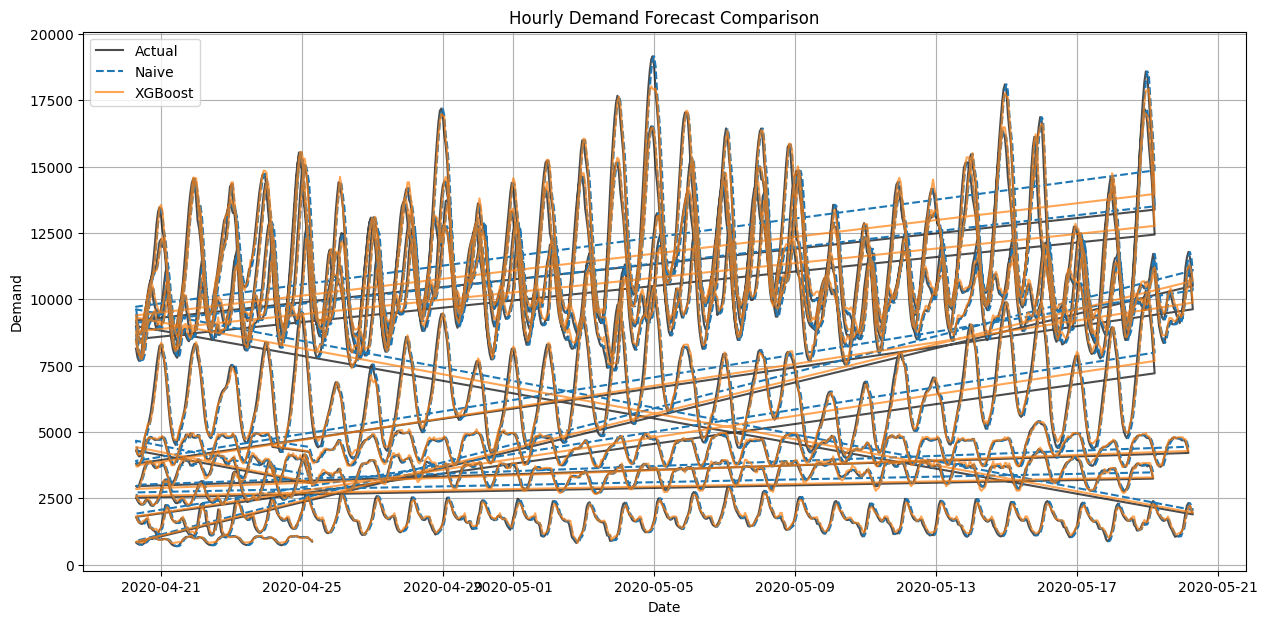

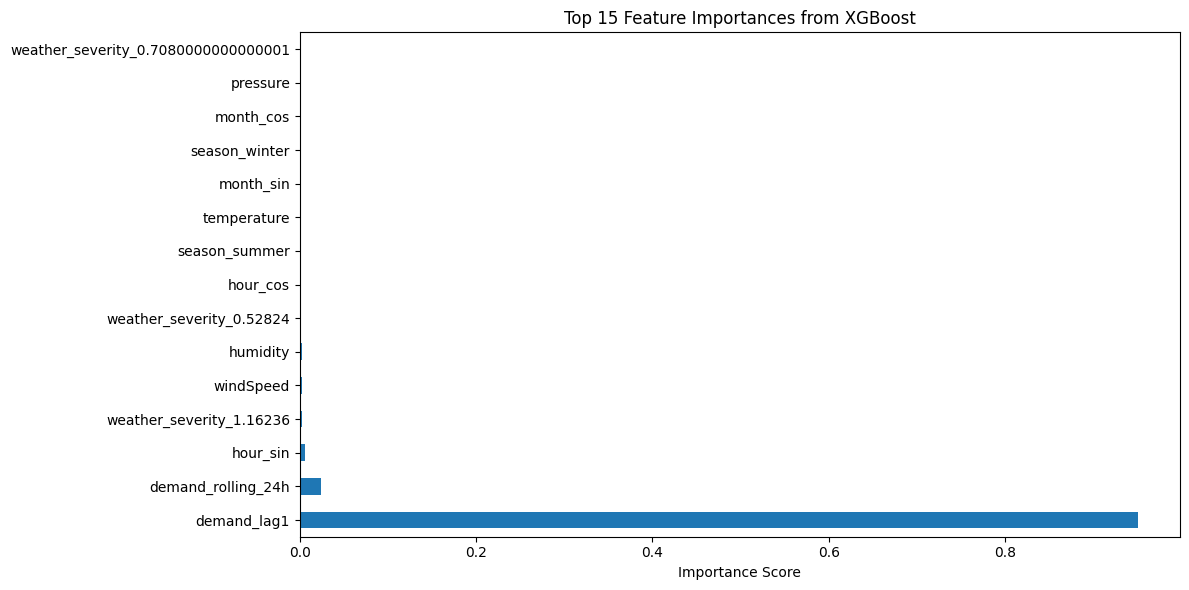


Best model saved as 'best_xgb_model.joblib'


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from joblib import Parallel, delayed, dump, load
import matplotlib.pyplot as plt
import seaborn as sns

# Configure parallel processing
N_JOBS = -1  # Use all cores

# Load and prepare data
def load_data(filepath):
    df = pd.read_csv(filepath)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    return df

# Feature engineering
def create_features(df):
    df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
    return df

# Train-test split by date
def temporal_train_test_split(df, test_date):
    train = df[df.index < test_date]
    test = df[df.index >= test_date].copy()  # Fix SettingWithCopyWarning
    return train, test

# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print()
    
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Visualization functions
def plot_results(y_test, y_pred_naive, y_pred_xgb):
    plt.figure(figsize=(15, 7))
    plt.plot(y_test.index, y_test, label='Actual', color='black', alpha=0.7)
    plt.plot(y_test.index, y_pred_naive, label='Naive', linestyle='--')
    plt.plot(y_test.index, y_pred_xgb, label='XGBoost', alpha=0.7)
    plt.title('Hourly Demand Forecast Comparison')
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.legend()
    plt.grid()
    plt.show()

    
# Configuration
DATA_PATH = '/kaggle/working/processed.csv'

# Load and prepare data
df = load_data(DATA_PATH)
print(f"Data loaded with shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
    
# Set test period to last 30 days
TEST_DATE = str(df.index.max() - pd.Timedelta(days=30))
print(f"\nTest period starts at: {TEST_DATE}")
    
df = create_features(df)
    
    # Define features
numeric_features = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos',
                       'temperature', 'humidity', 'windSpeed', 'pressure',
                       'demand_lag1', 'demand_rolling_24h']
categorical_features = ['is_weekend', 'season', 'weather_severity']
target = 'demand'
    
    # Temporal train-test split
train, test = temporal_train_test_split(df, TEST_DATE)
X_train, y_train = train[numeric_features + categorical_features], train[target]
X_test, y_test = test[numeric_features + categorical_features], test[target]
    
    # Preprocessing pipeline
preprocessor = ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
])
    
    # 1. Naive Baseline
test['naive_pred'] = test['demand_lag1']  # Properly using .loc would be better for production
y_pred_naive = test['naive_pred']
baseline_metrics = evaluate_model(y_test, y_pred_naive, "Naive Baseline")
    
    # 2. XGBoost (best performing model)
xgb = Pipeline([
        ('preprocessor', preprocessor),
        ('xgbregressor', XGBRegressor(tree_method='hist', n_jobs=N_JOBS))
])
    
param_grid = {
        'xgbregressor__n_estimators': [50, 100],
        'xgbregressor__max_depth': [3, 6],
        'xgbregressor__learning_rate': [0.01, 0.1]
}
    
grid_search = GridSearchCV(
        xgb,
        param_grid,
        cv=TimeSeriesSplit(n_splits=3),
        scoring='neg_mean_absolute_error',
        n_jobs=N_JOBS,
        verbose=1
)
    
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
xgb_metrics = evaluate_model(y_test, y_pred_xgb, "XGBoost (Tuned)")
    
    # Results comparison
results = pd.DataFrame({
        'Naive': baseline_metrics,
        'XGBoost': xgb_metrics
}).T
print("\nModel Comparison:")
print(results)
    
    # Visualization
plot_results(y_test, y_pred_naive, y_pred_xgb)
    
    # Save the best model
dump(best_xgb, 'best_xgb_model.joblib')
print("\nBest model saved as 'best_xgb_model.joblib'")


Model Performance Comparison:
                       MAE        RMSE      MAPE        R²
XGBoost         193.271820  271.206935  2.883191  0.995532
Naive Baseline  272.085403  371.018798  3.916461  0.991638


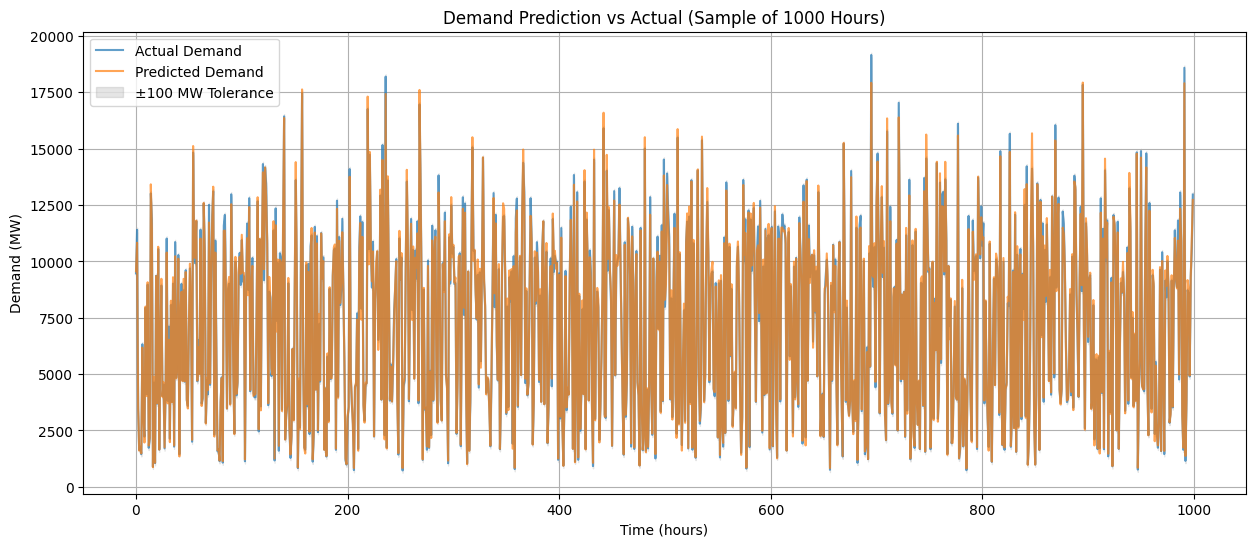

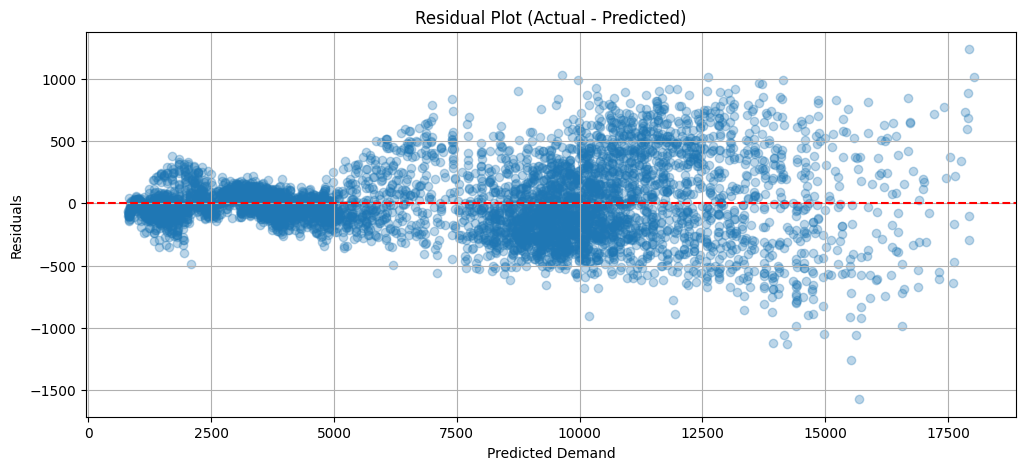

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


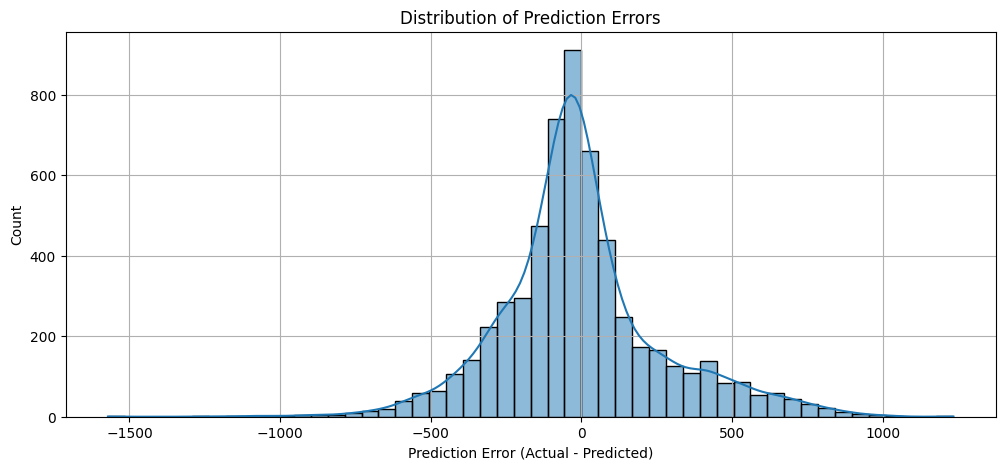

In [12]:
# 1. Load your saved model (if needed)
from joblib import load
best_xgb = load('best_xgb_model.joblib')  # Skip if you already have the model in memory

# 2. Make predictions on test set
y_pred = best_xgb.predict(X_test)

# 3. Evaluate performance
def detailed_evaluation(y_true, y_pred):
    from sklearn.metrics import (mean_absolute_error, 
                               mean_squared_error, 
                               mean_absolute_percentage_error,
                               r2_score)
    
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred) * 100,
        'R²': r2_score(y_true, y_pred)
    }
    
    # Compare with naive baseline
    naive_pred = X_test['demand_lag1']
    naive_metrics = {
        'MAE': mean_absolute_error(y_true, naive_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, naive_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, naive_pred) * 100,
        'R²': r2_score(y_true, naive_pred)
    }
    
    # Create comparison table
    comparison = pd.DataFrame({
        'XGBoost': metrics,
        'Naive Baseline': naive_metrics
    }).T
    
    return comparison

# 4. Get detailed evaluation
results = detailed_evaluation(y_test, y_pred)
print("\nModel Performance Comparison:")
print(results)

# 5. Visualize predictions vs actuals
def plot_predictions(y_true, y_pred, samples=1000):
    plt.figure(figsize=(15, 6))
    
    # Plot first N samples for clarity
    if len(y_true) > samples:
        idx = np.random.choice(len(y_true), samples, replace=False)
        y_true = y_true.iloc[idx]
        y_pred = y_pred[idx]
    
    plt.plot(y_true.values, label='Actual Demand', alpha=0.7)
    plt.plot(y_pred, label='Predicted Demand', alpha=0.7)
    plt.fill_between(range(len(y_true)), 
                    y_true.values - 100, 
                    y_true.values + 100, 
                    color='gray', alpha=0.2, label='±100 MW Tolerance')
    
    plt.title(f'Demand Prediction vs Actual (Sample of {len(y_true)} Hours)')
    plt.xlabel('Time (hours)')
    plt.ylabel('Demand (MW)')
    plt.legend()
    plt.grid()
    plt.show()

plot_predictions(y_test, y_pred)

# 6. Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(12, 5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Actual - Predicted)')
plt.xlabel('Predicted Demand')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# 7. Error Distribution Analysis
plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.grid()
plt.show()

In [14]:
import pandas as pd
import numpy as np
from joblib import load

# Load your trained model (replace with your actual model path)
best_xgb = load('best_xgb_model.joblib') 

# Define feature names (must match your training data)
numeric_features = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos',
                   'temperature', 'humidity', 'windSpeed', 'pressure',
                   'demand_lag1', 'demand_rolling_24h']
categorical_features = ['is_weekend', 'season', 'weather_severity']

# 1. Define the prediction function
def predict_demand(model, new_data, numeric_features, categorical_features):
    """Make predictions using the trained model"""
    # Select only the features the model expects
    X_new = new_data[numeric_features + categorical_features]
    return model.predict(X_new)

# 2. Function to get user input
def get_user_input():
    print("\n⚡ Enter the following details for demand prediction:")
    
    # Time features
    hour = float(input("→ Enter current hour (0-23): "))
    month = int(input("→ Enter current month (1-12): "))
    
    # Weather features
    temperature = float(input("→ Enter temperature (°C): "))
    humidity = float(input("→ Enter humidity (%): "))
    wind_speed = float(input("→ Enter wind speed (km/h): "))
    pressure = float(input("→ Enter pressure (hPa): "))
    
    # Historical demand
    demand_lag1 = float(input("→ Enter previous hour's demand (MW): "))
    demand_rolling_24h = float(input("→ Enter 24-hour average demand (MW): "))
    
    # Categorical features
    is_weekend = int(input("→ Is it a weekend? (0=No, 1=Yes): "))
    season = input("→ Enter season (winter/spring/summer/fall): ").lower()
    weather_severity = input("→ Enter weather severity (mild/moderate/severe): ").lower()
    
    # Calculate cyclical features automatically
    hour_sin = np.sin(2 * np.pi * hour / 24)
    hour_cos = np.cos(2 * np.pi * hour / 24)
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)
    
    return pd.DataFrame({
        'hour_sin': [hour_sin],
        'hour_cos': [hour_cos],
        'month_sin': [month_sin],
        'month_cos': [month_cos],
        'temperature': [temperature],
        'humidity': [humidity],
        'windSpeed': [wind_speed],
        'pressure': [pressure],
        'demand_lag1': [demand_lag1],
        'demand_rolling_24h': [demand_rolling_24h],
        'is_weekend': [is_weekend],
        'season': [season],
        'weather_severity': [weather_severity]
    })

# 3. Interactive prediction loop
def interactive_predictor(model):
    print("\n🔮 Electricity Demand Predictor")
    print("-------------------------------")
    
    while True:
        try:
            input_data = get_user_input()
            prediction = predict_demand(model, input_data, numeric_features, categorical_features)
            print(f"\n✅ Predicted Demand: {prediction[0]:.2f} MW")
            
            if input("\nPredict again? (y/n): ").lower() != 'y':
                print("Goodbye! 👋")
                break
                
        except Exception as e:
            print(f"❌ Error: {str(e)}")

# Run the predictor
if __name__ == "__main__":
    interactive_predictor(best_xgb)


🔮 Electricity Demand Predictor
-------------------------------

⚡ Enter the following details for demand prediction:


→ Enter current hour (0-23):  12
→ Enter current month (1-12):  5
→ Enter temperature (°C):  32
→ Enter humidity (%):  23
→ Enter wind speed (km/h):  4
→ Enter pressure (hPa):  9
→ Enter previous hour's demand (MW):  98
→ Enter 24-hour average demand (MW):  89
→ Is it a weekend? (0=No, 1=Yes):  1
→ Enter season (winter/spring/summer/fall):  spring
→ Enter weather severity (mild/moderate/severe):  moderate



✅ Predicted Demand: 786.12 MW



Predict again? (y/n):  n


Goodbye! 👋
